In [1]:
from itertools import combinations, groupby

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import spatial


from pymutspec.draw import plot_mutspec192, plot_mutspec12, sbs_orders

### Read file with calculated mutational spectrum 

In [2]:
mutspecs = pd.read_csv('../data/new_dataset/MutSpecVertebrates192.csv.gz')
mutspecs = mutspecs[mutspecs.Gene == 'Cytb']
mutspecs = mutspecs.fillna(0)
mutspecs.head()

,Gene,Class,Species,Mut,Observed,Expected,MutSpec
39552,Cytb,Mammalia,Tarsius_dentatus,A[A>C]A,0.0,0.00,0.0
39553,Cytb,Mammalia,Tarsius_dentatus,A[A>C]C,0.0,0.00,0.0
39554,Cytb,Mammalia,Tarsius_dentatus,A[A>C]G,0.0,0.00,0.0
39555,Cytb,Mammalia,Tarsius_dentatus,A[A>C]T,0.0,0.00,0.0
39556,Cytb,Mammalia,Tarsius_dentatus,C[A>C]A,0.0,11.95,0.0


In [3]:
def getrevers(mut):
    translator = str.maketrans("ACGT", "TGCA")
    new_mut = mut[-1] + mut[1:-1] + mut[0]
    new_mut = new_mut.translate(translator)
    return new_mut

### Here we translate our mutspec with reverse on HEAVY CHAIN

In [4]:
mutspecs['Mut'] = mutspecs.Mut.apply(getrevers)
mutspecs["MutBase"] = mutspecs.Mut.str.slice(2, 5)
mutspecs["Context"] = mutspecs.Mut.str.get(0) + mutspecs.Mut.str.get(2) + mutspecs.Mut.str.get(-1)
mutspecs.head()

,Gene,Class,Species,Mut,Observed,Expected,MutSpec,MutBase,Context
39552,Cytb,Mammalia,Tarsius_dentatus,T[T>G]T,0.0,0.00,0.0,T>G,TTT
39553,Cytb,Mammalia,Tarsius_dentatus,G[T>G]T,0.0,0.00,0.0,T>G,GTT
39554,Cytb,Mammalia,Tarsius_dentatus,C[T>G]T,0.0,0.00,0.0,T>G,CTT
39555,Cytb,Mammalia,Tarsius_dentatus,A[T>G]T,0.0,0.00,0.0,T>G,ATT
39556,Cytb,Mammalia,Tarsius_dentatus,T[T>G]G,0.0,11.95,0.0,T>G,TTG


### Function to draw MutSpec

### Plot Mutational Spectrum for all Vertebrates for Cytb

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


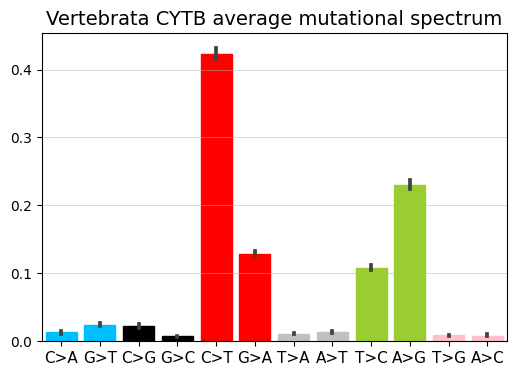

In [5]:
_species_spectra12 = mutspecs.copy()
_species_spectra12["Mut"] = _species_spectra12["Mut"].str.slice(2,5)
ax = plot_mutspec12(
    _species_spectra12.groupby(["Species", "Mut"]).MutSpec.sum().reset_index(), 
    fontname="Arial", ticksize=11, title="Vertebrata CYTB average mutational spectrum",
    savepath="../pictures/MutSpec/Mut12Vert.pdf")

findfont: Font family ['Courier'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Courier'] not found. Falling back to DejaVu Sans.


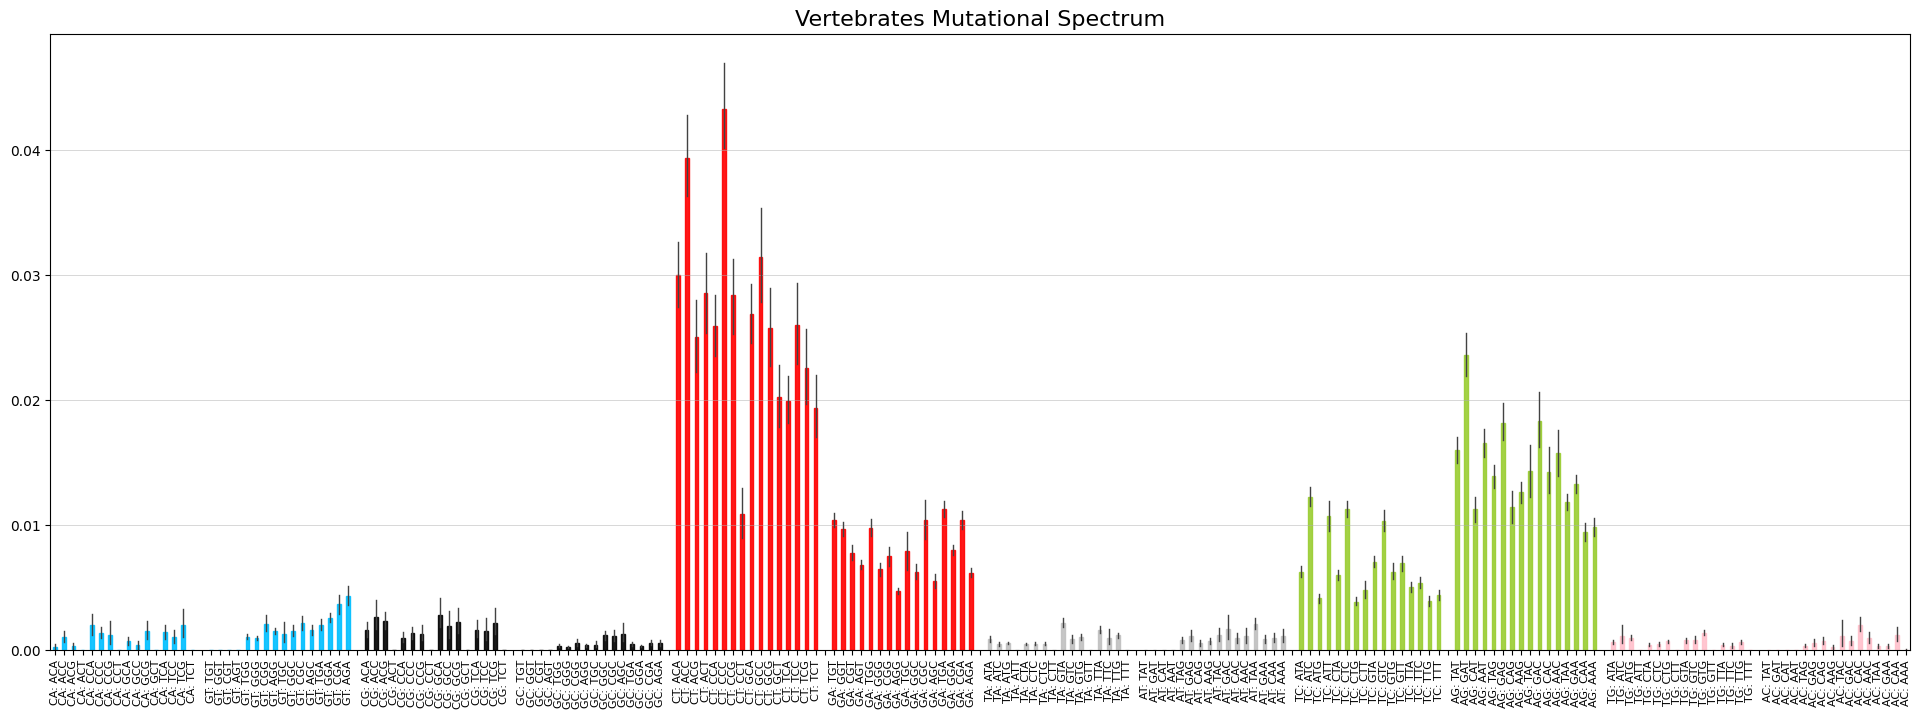

<AxesSubplot:title={'center':'Vertebrates Mutational Spectrum'}>

In [6]:
plot_mutspec192(mutspecs, title='Vertebrates Mutational Spectrum', savepath='../pictures/MutSpec/MutSpec192Vert.pdf',
                fontname='Courier', ticksize=8, labels_style='long')

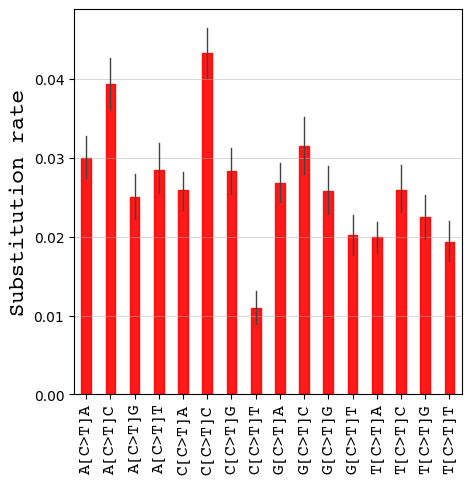

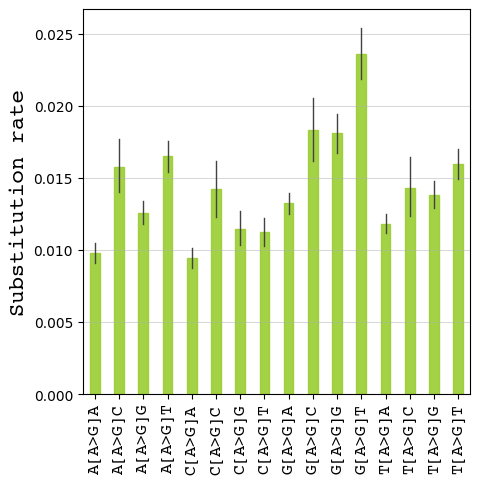

<AxesSubplot:ylabel='Substitution rate'>

In [5]:
from pymutspec.draw.sbs_orders import ordered_sbs192_kp


plot_mutspec192(mutspecs, title="", ylabel="Substitution rate",  fontname="Courier", 
                ticksize=12, sbs_order=ordered_sbs192_kp[64:64+16], figsize=(5, 5), savepath="../pictures/fig5a.pdf") # svg
plot_mutspec192(mutspecs, title="", ylabel="Substitution rate", fontname="Courier", 
                ticksize=12, sbs_order=sorted(ordered_sbs192_kp[16*9:16*9+16]), figsize=(5, 5), savepath="../pictures/fig5b.pdf") # svg

In [7]:
### Do the same for syn cancer

from pymutspec.constants import possible_sbs192_set

canc_df = pd.read_csv('../data/human_cancer_spectra_patient_specific_syn.csv')
canc_df = canc_df.drop(['nobs'], axis=1)

for sbs in possible_sbs192_set:
    if sbs not in canc_df.columns:
        canc_df[sbs] = 0

canc_df = canc_df.melt(id_vars=['sample'], value_vars=canc_df.columns[1:])\
    .sort_values(by=['sample']).reset_index(drop=True)
canc_df = canc_df.rename(columns={'variable': 'Mut', 'value': 'MutSpec'})
canc_df['Class'] = 'Cancer'
canc_df['Mut'] = canc_df.Mut.apply(getrevers)
canc_df['MutBase'] = canc_df['Mut'].str.get(2) + '>' + canc_df['Mut'].str.get(4)
canc_df.head()


/var/folders/zp/hykk29rd2lndslkkjgkzfb640000gn/T/ipykernel_5886/3141937486.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  canc_df[sbs] = 0


,sample,Mut,MutSpec,Class,MutBase
0,0007_CRUK_PC_0007,T[T>C]T,0.0,Cancer,T>C
1,0007_CRUK_PC_0007,G[G>T]T,0.0,Cancer,G>T
2,0007_CRUK_PC_0007,C[T>A]C,0.0,Cancer,T>A
3,0007_CRUK_PC_0007,A[T>C]C,0.0,Cancer,T>C
4,0007_CRUK_PC_0007,T[T>G]C,0.0,Cancer,T>G


In [9]:
canc_df_draw = canc_df.groupby('Mut').MutSpec.mean().reset_index()
canc_df_draw

,Mut,MutSpec
0,A[A>C]A,0.000000
1,A[A>C]C,0.000000
2,A[A>C]G,0.000000
3,A[A>C]T,0.000000
4,A[A>G]A,0.000343
...,...,...
187,T[T>C]T,0.000019
188,T[T>G]A,0.000000
189,T[T>G]C,0.000000
190,T[T>G]G,0.000015


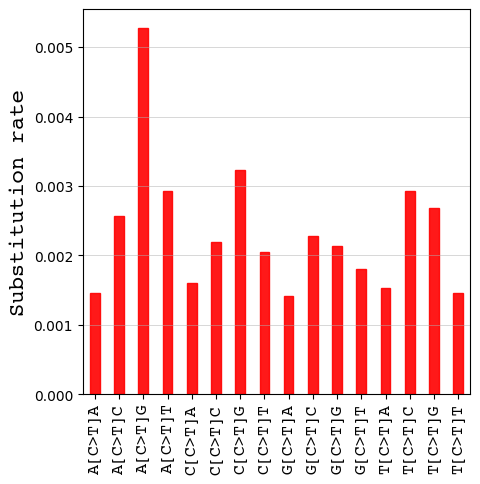

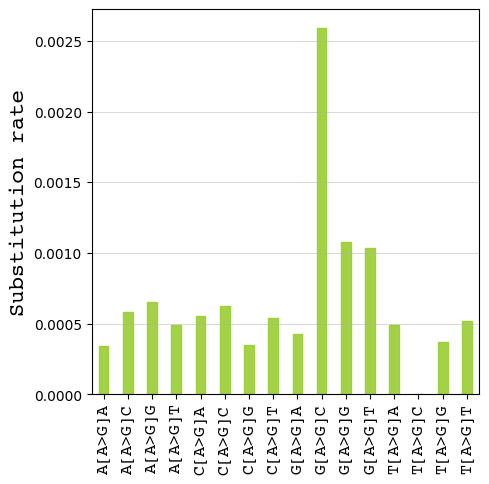

<AxesSubplot:ylabel='Substitution rate'>

In [12]:
plot_mutspec192(canc_df_draw, title="", ylabel="Substitution rate",  fontname="Courier", 
                ticksize=12, sbs_order=ordered_sbs192_kp[64:64+16], figsize=(5, 5), savepath="../pictures/fig5c_cancer.pdf") # svg
plot_mutspec192(canc_df_draw, title="", ylabel="Substitution rate", fontname="Courier", 
                ticksize=12, sbs_order=sorted(ordered_sbs192_kp[16*9:16*9+16]), figsize=(5, 5), savepath="../pictures/fig5d_cancer.pdf") # svg

### How many classes we have

How many classes obtained from mutspec

In [8]:
mutspecs['Class'].value_counts() // 192

Mammalia        791
Actinopteri     523
Lepidosauria    177
Aves            130
Amphibia         76
Name: Class, dtype: int64

How many species we have

In [9]:
len(mutspecs.Species.unique())

1697

### Make SuplFile1, where one row - one species

In [10]:
mutspecs.head()

,Gene,Class,Species,Mut,Observed,Expected,MutSpec,MutBase,Context
39552,Cytb,Mammalia,Tarsius_dentatus,T[T>G]T,0.0,0.00,0.0,T>G,TTT
39553,Cytb,Mammalia,Tarsius_dentatus,G[T>G]T,0.0,0.00,0.0,T>G,GTT
39554,Cytb,Mammalia,Tarsius_dentatus,C[T>G]T,0.0,0.00,0.0,T>G,CTT
39555,Cytb,Mammalia,Tarsius_dentatus,A[T>G]T,0.0,0.00,0.0,T>G,ATT
39556,Cytb,Mammalia,Tarsius_dentatus,T[T>G]G,0.0,11.95,0.0,T>G,TTG


In [42]:
suplfile1 = mutspecs.drop(['Expected', 'Observed', 'MutBase', 'Context'], axis=1)
suplfile1 = suplfile1.pivot(index=["Species"], columns="Mut", values="MutSpec").reset_index()
suplfile1 = pd.merge(suplfile1, mutspecs[['Species', 'Class']].drop_duplicates(), on='Species')
suplfile1.head()

,Species,A[A>C]A,A[A>C]C,A[A>C]G,A[A>C]T,A[A>G]A,A[A>G]C,A[A>G]G,A[A>G]T,A[A>T]A,...,T[T>A]T,T[T>C]A,T[T>C]C,T[T>C]G,T[T>C]T,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T,Class
0,Abbottina_rivularis,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.02029,0.0,0.022674,0.019057,0.0,0.0,0.0,0.0,Actinopteri
1,Ablepharus_budaki,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,Lepidosauria
2,Ablepharus_chernovi,0.0,0.0,0.0,0.0,0.038546,0.0,0.011984,0.020437,0.0,...,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,Lepidosauria
3,Ablepharus_kitaibelii,0.0,0.0,0.0,0.0,0.020875,0.0,0.027828,0.000000,0.0,...,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,Lepidosauria
4,Abramis_brama,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,Actinopteri


In [43]:
# Change order of the columns
cols = suplfile1.columns.to_list()
col_move = 'Class'
cols.remove(col_move)
cols.insert(1,col_move)

suplfile1 = suplfile1[cols]
suplfile1.head()

,Species,Class,A[A>C]A,A[A>C]C,A[A>C]G,A[A>C]T,A[A>G]A,A[A>G]C,A[A>G]G,A[A>G]T,...,T[T>A]G,T[T>A]T,T[T>C]A,T[T>C]C,T[T>C]G,T[T>C]T,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T
0,Abbottina_rivularis,Actinopteri,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.02029,0.0,0.022674,0.019057,0.0,0.0,0.0,0.0
1,Ablepharus_budaki,Lepidosauria,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,Ablepharus_chernovi,Lepidosauria,0.0,0.0,0.0,0.0,0.038546,0.0,0.011984,0.020437,...,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,Ablepharus_kitaibelii,Lepidosauria,0.0,0.0,0.0,0.0,0.020875,0.0,0.027828,0.000000,...,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,Abramis_brama,Actinopteri,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [44]:
suplfile1.to_csv('../ToPaper/SuplFiles/SupplementaryTable1.csv', index=False)

In [45]:
suplfile1.Species.to_csv('../ToPaper/SuplFiles/SupplementaryFile1.csv', index=False) # save only species names for suplfile1

### Draw Mutational Spectra for different classes

In [11]:
taxes_to_draw = ['Mammalia', 'Aves', 'Actinopteri', 'Lepidosauria', 'Amphibia']

savepath = ../pictures/MutSpec/MammaliaMut192Comp.pdf


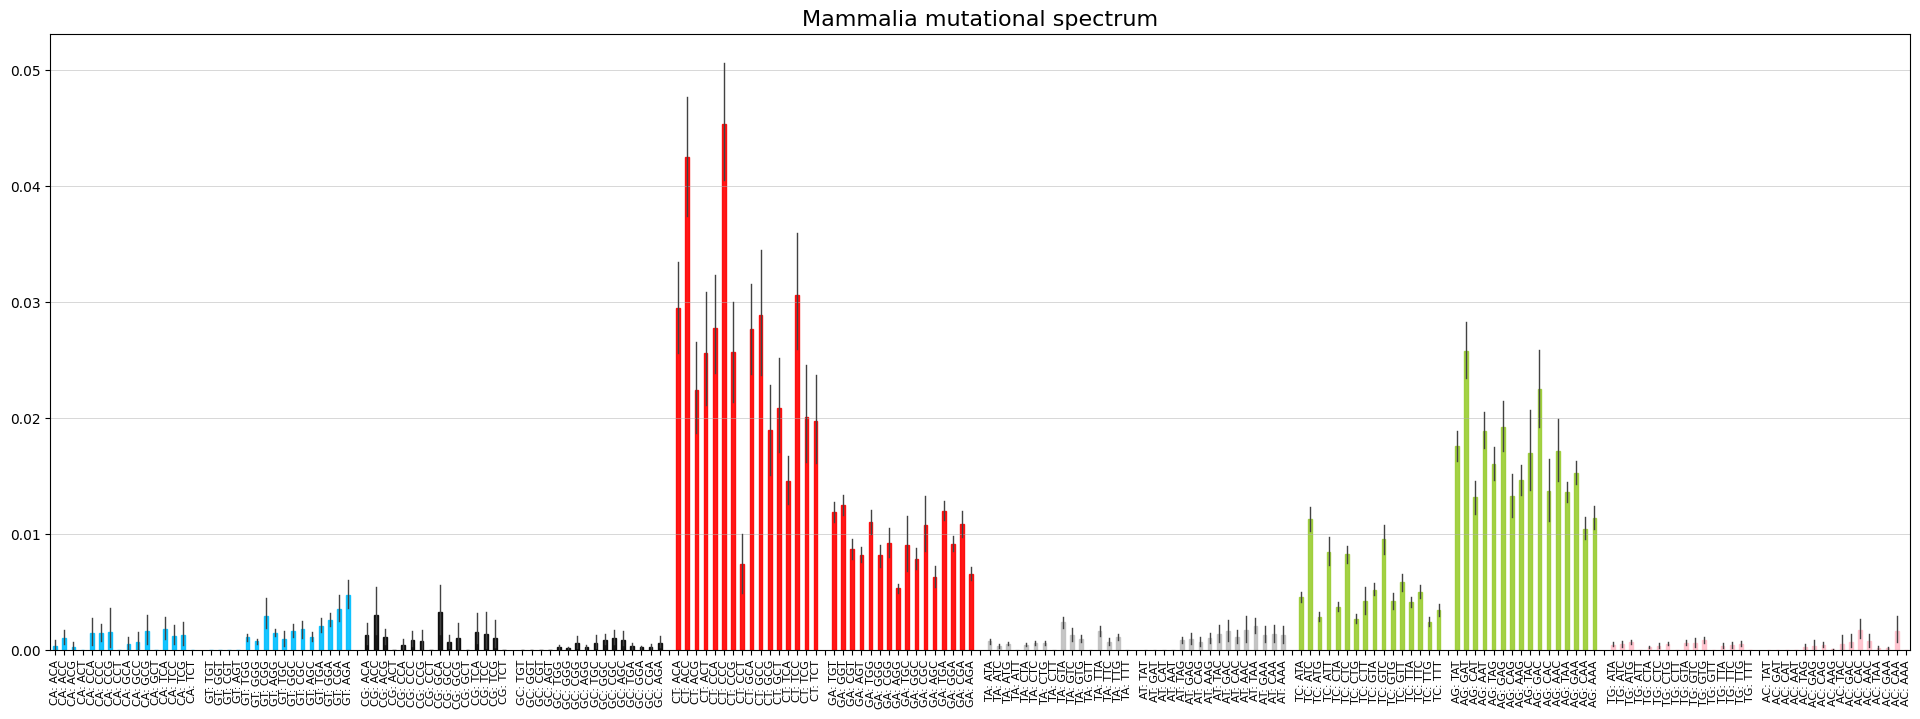

savepath = ../pictures/MutSpec/AvesMut192Comp.pdf


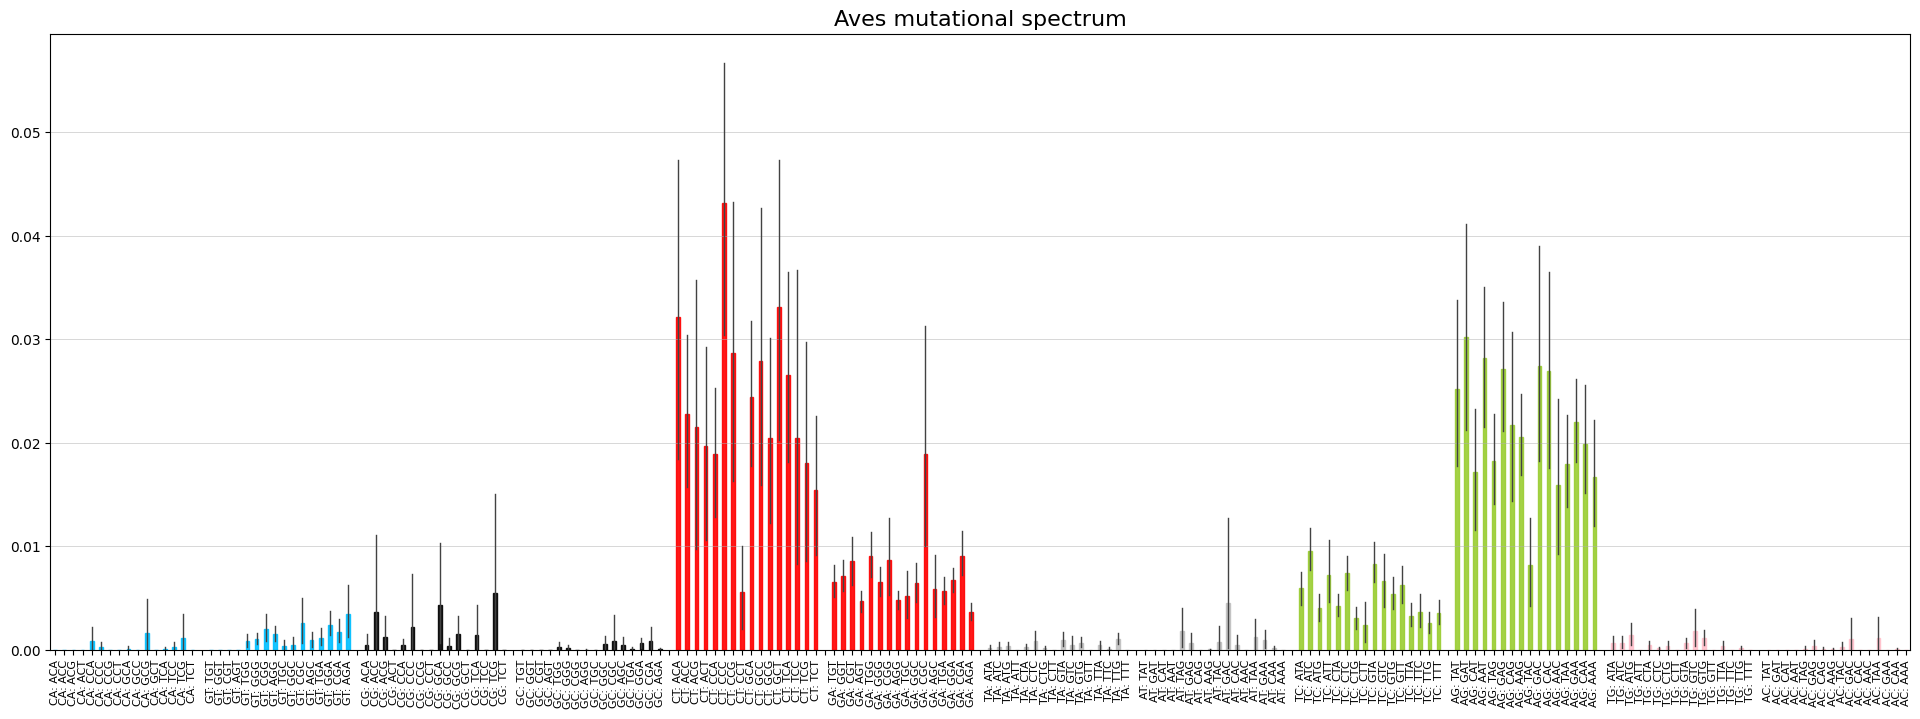

savepath = ../pictures/MutSpec/ActinopteriMut192Comp.pdf


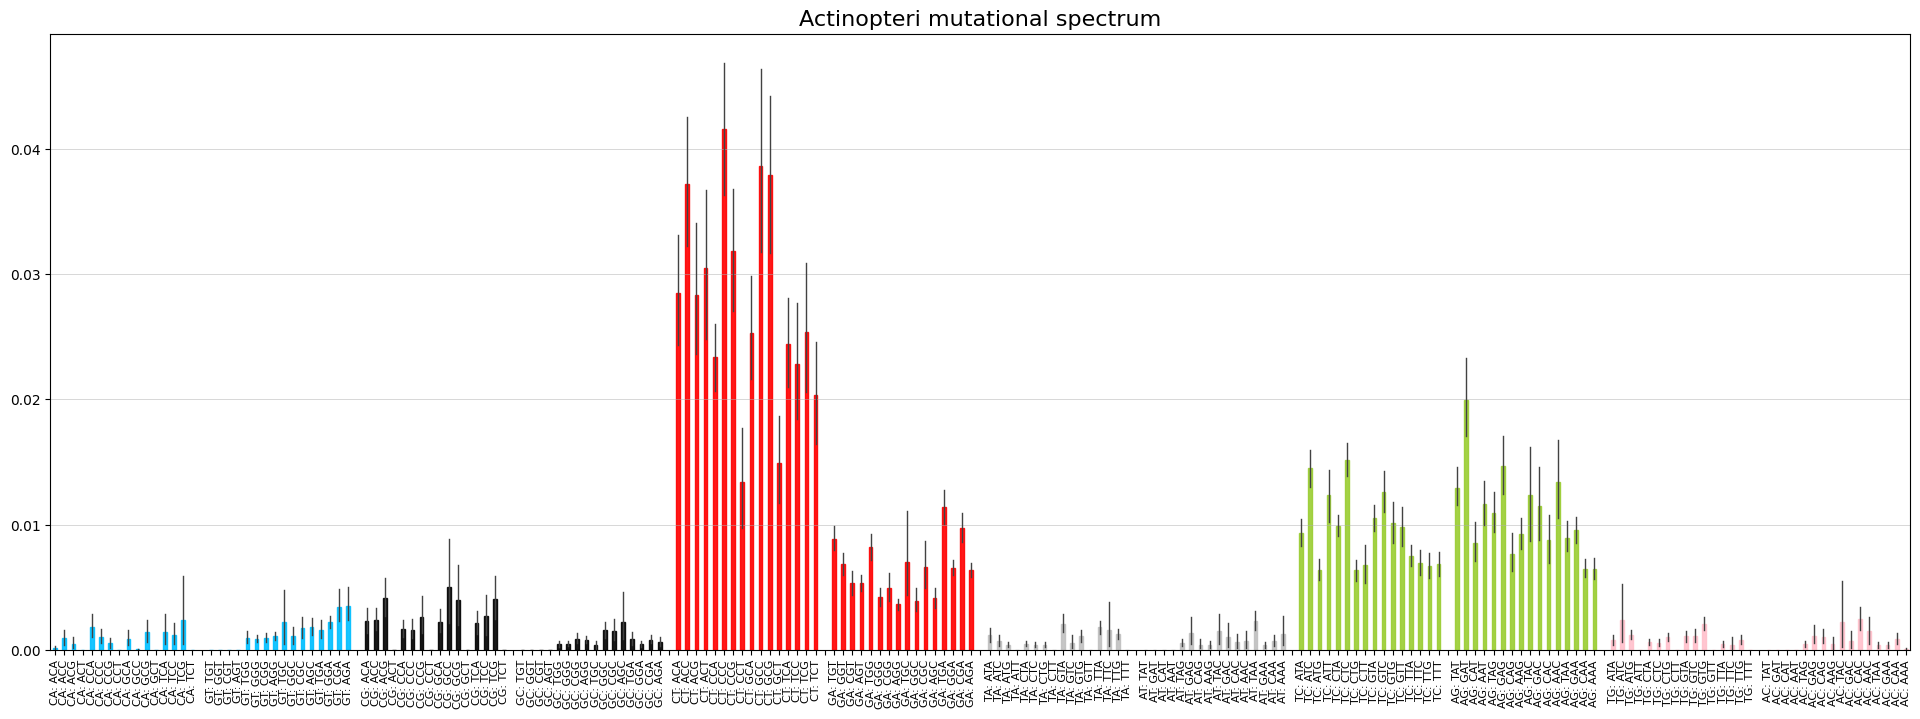

savepath = ../pictures/MutSpec/LepidosauriaMut192Comp.pdf


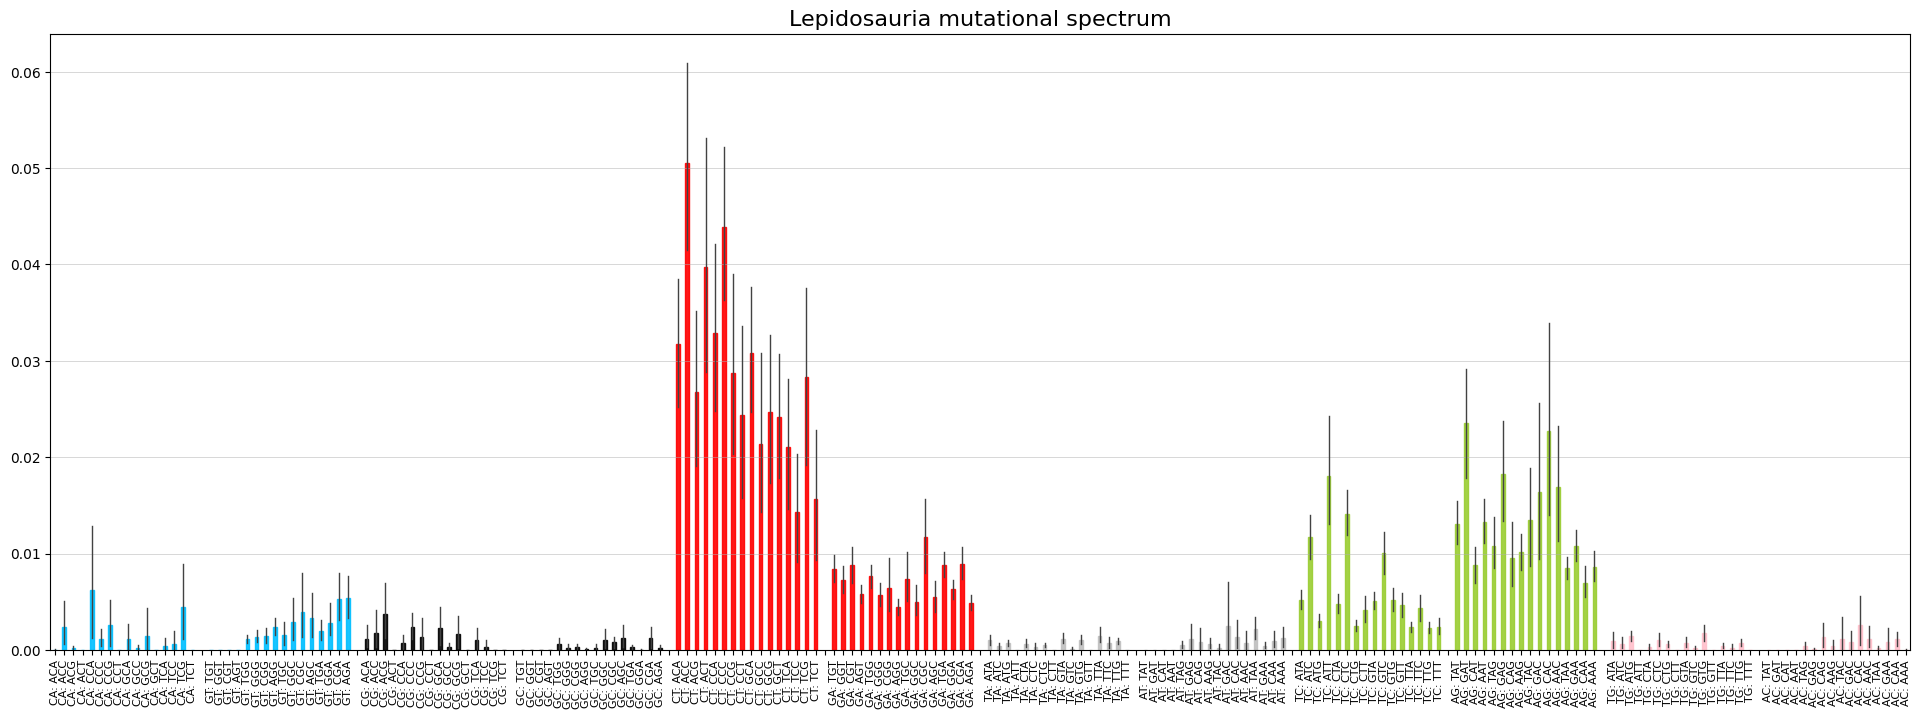

savepath = ../pictures/MutSpec/AmphibiaMut192Comp.pdf


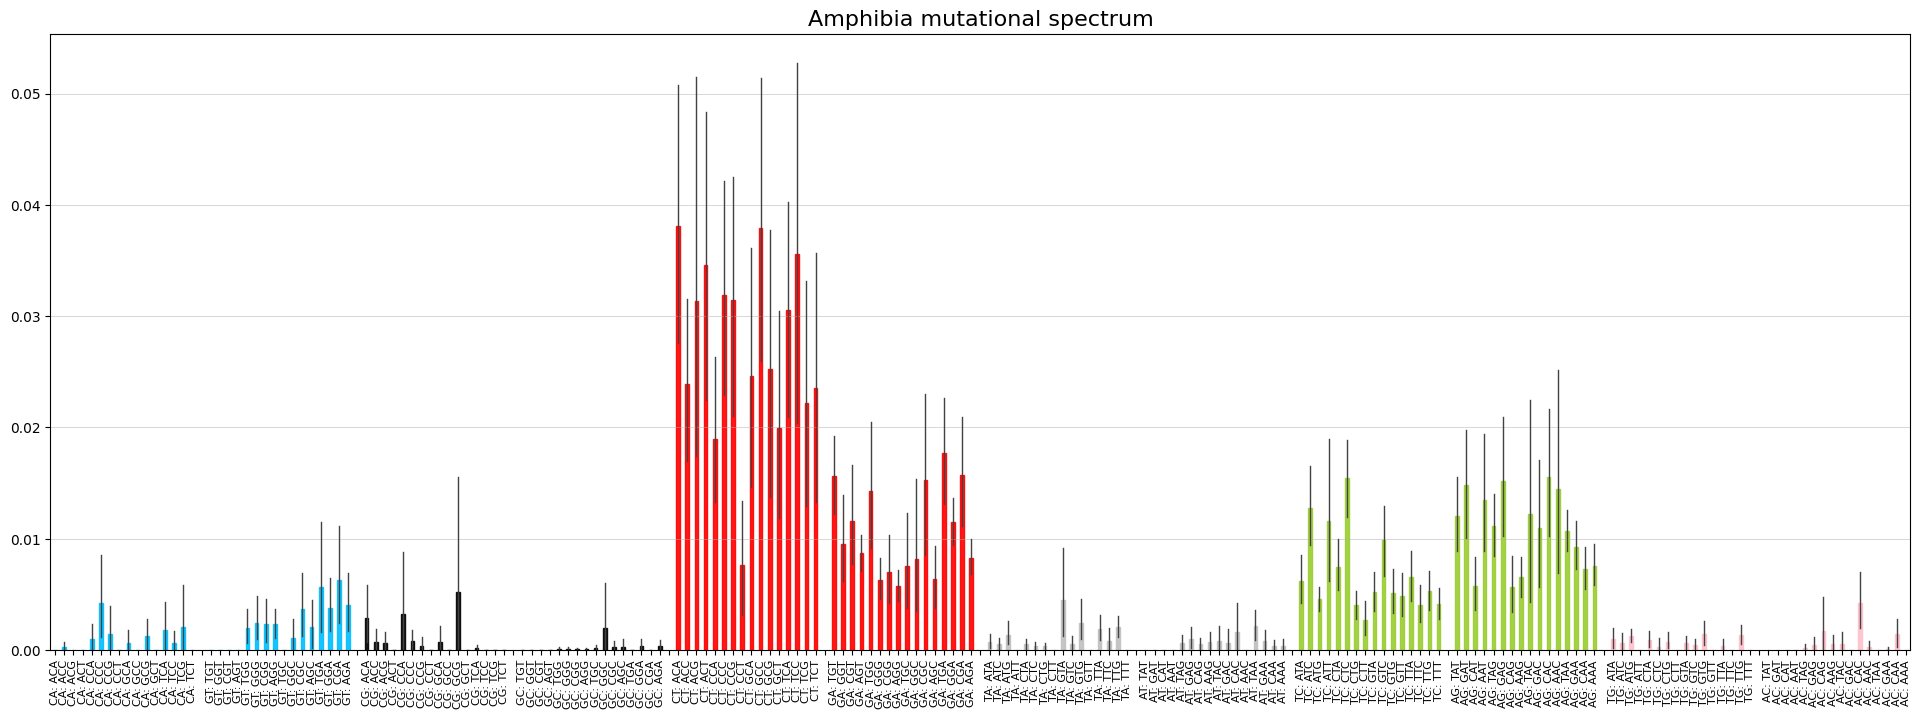

In [13]:
for tax in taxes_to_draw:
    plot_mutspec192(mutspecs[mutspecs['Class'] == tax], title=f'{tax} mutational spectrum',
    filepath=f'../pictures/MutSpec/{tax}Mut192Comp.pdf', fontname='Courier', ticksize=8, labels_style='long')

In [60]:
needed_classes = ['Mammalia', 'Aves', 'Amphibia', 'Lepidosauria', 'Actinopterygi', 'exdloop']

## Download cancer mutspec 

In [17]:
cancer = pd.read_csv('../data/external/cancer_mutspec.csv')
cancer = cancer.loc[:,['Mut','MutSpec_ExDloop']]

In [18]:
cancer.head()

,Mut,MutSpec_ExDloop
0,A[A>C]A,0.000000
1,A[A>C]C,0.000783
2,A[A>C]G,0.000000
3,A[A>C]T,0.000084
4,A[A>G]A,0.008273


In [19]:
exdloop = cancer.iloc[:,[0,1]]
exdloop['Class'] = 'cancer'
exdloop = exdloop.rename(columns={'MutSpec_ExDloop': 'MutSpec'})


In [21]:
exdloop["MutBase"] = exdloop.Mut.str.slice(2, 5)
exdloop["Context"] = exdloop.Mut.str.get(0) + exdloop.Mut.str.get(2) + exdloop.Mut.str.get(-1)
exdloop.head()

,Mut,MutSpec,Class,MutBase,Context
0,A[A>C]A,0.000000,cancer,A>C,AAA
1,A[A>C]C,0.000783,cancer,A>C,AAC
2,A[A>C]G,0.000000,cancer,A>C,AAG
3,A[A>C]T,0.000084,cancer,A>C,AAT
4,A[A>G]A,0.008273,cancer,A>G,AAA


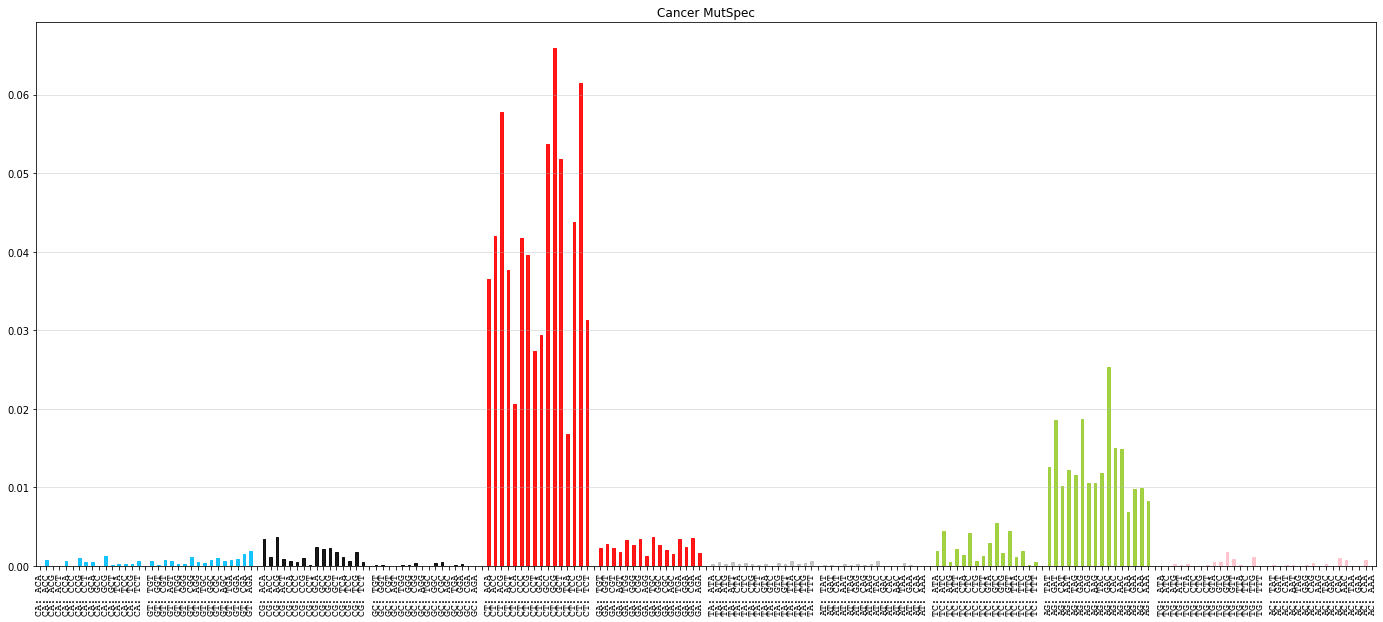

In [23]:
plot_mutspec192(mutspec192=exdloop, title='Cancer MutSpec', filepath='../pictures/MutSpec/MutSpec192Cancers.pdf',
                fontname='Courier', fontsize=10)

### Analysis of C>T on heavy chain as a hallmark of oxidative damage

In [61]:
mutspecs.head()

,Gene,Class,Species,Mut,Observed,Expected,MutSpec,MutBase,Context
60288,Cytb,Aves,Aulacorhynchus_haematopygus,T[T>G]T,0.0,0.0,0.0,T>G,TTT
60289,Cytb,Aves,Aulacorhynchus_haematopygus,G[T>G]T,0.0,0.0,0.0,T>G,GTT
60290,Cytb,Aves,Aulacorhynchus_haematopygus,C[T>G]T,0.0,0.0,0.0,T>G,CTT
60291,Cytb,Aves,Aulacorhynchus_haematopygus,A[T>G]T,0.0,0.0,0.0,T>G,ATT
60292,Cytb,Aves,Aulacorhynchus_haematopygus,T[T>G]G,0.0,9.0,0.0,T>G,TTG


In [62]:
CT_only = mutspecs[mutspecs['MutBase'] == 'C>T']
C_T_arr = ["A[C>T]A", "A[C>T]C", "A[C>T]G", "A[C>T]T", "C[C>T]A", "C[C>T]C", "C[C>T]G", "C[C>T]T", 
    "G[C>T]A", "G[C>T]C", "G[C>T]G", "G[C>T]T", "T[C>T]A", "T[C>T]C", "T[C>T]G", "T[C>T]T"]

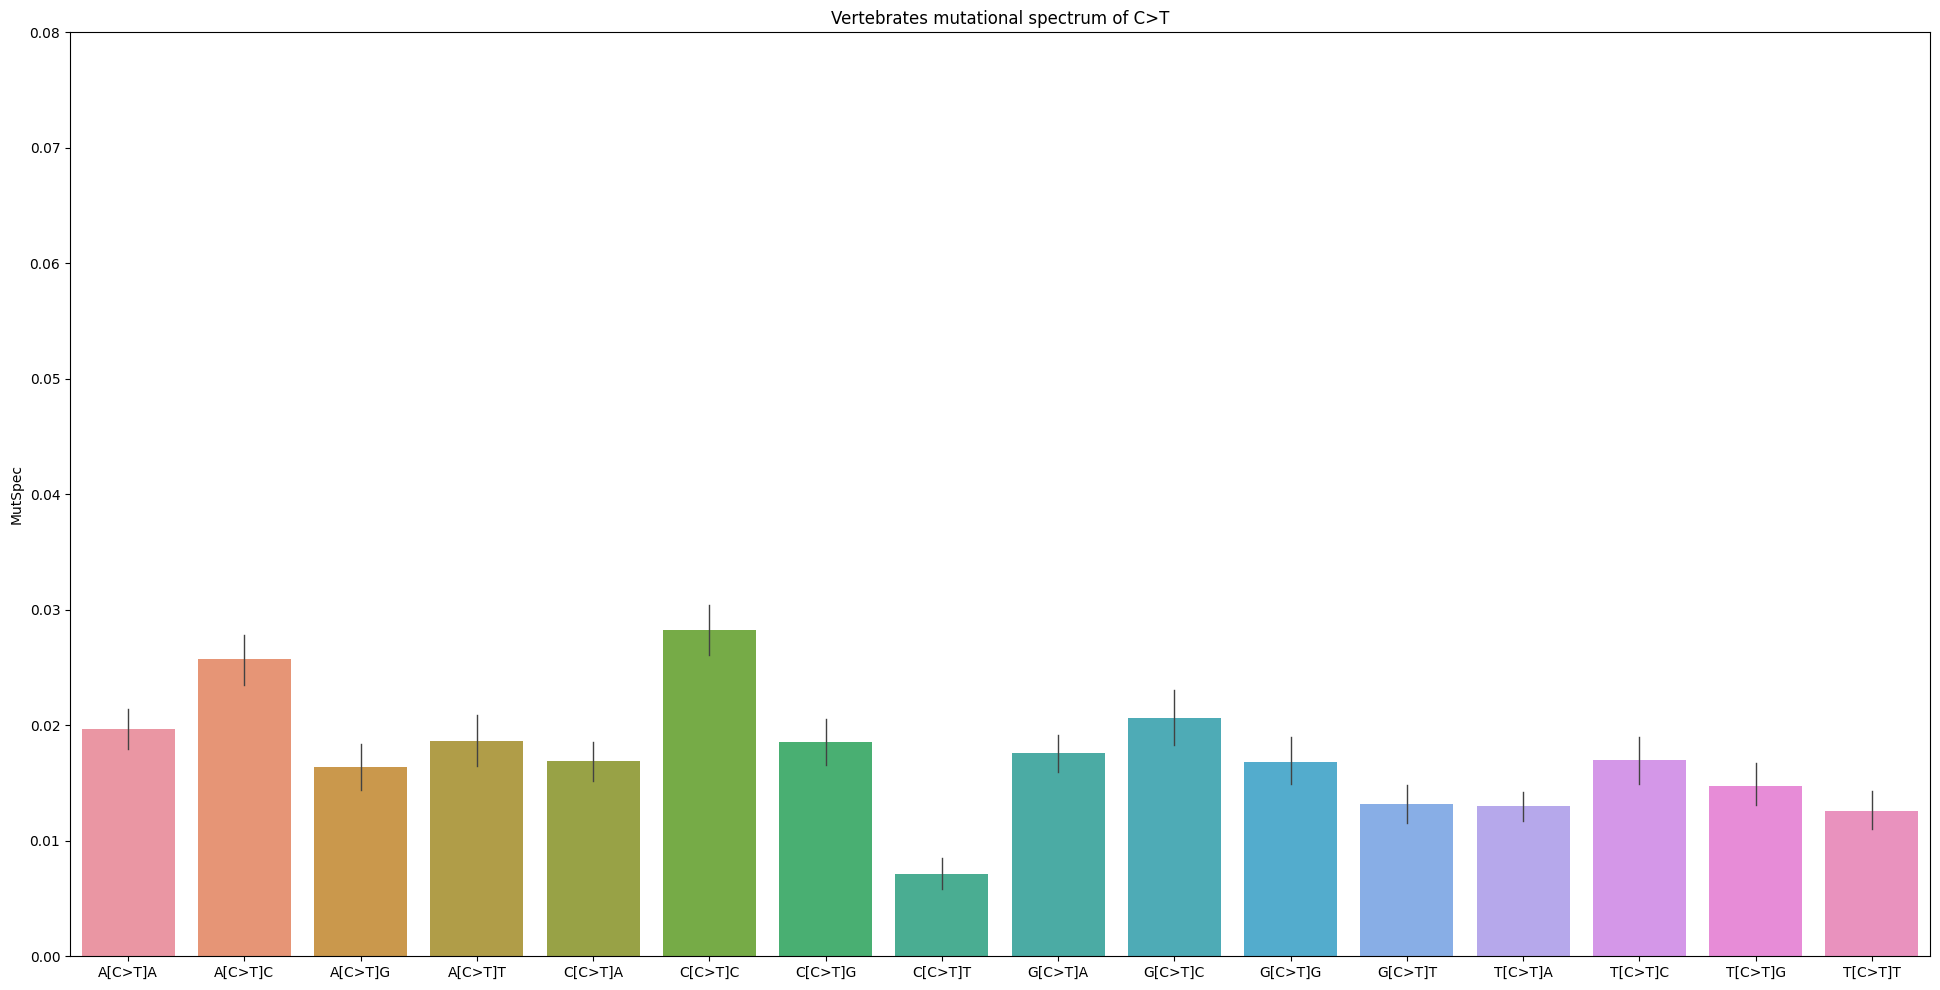

In [63]:
fig = plt.figure(figsize=(24, 12))
ax = fig.add_subplot(111)
sns.barplot(x="Mut", y="MutSpec", data=CT_only,
            order=C_T_arr, errwidth=1, ax=fig.gca())
ax.set_xlabel('')
ax.set_title('Vertebrates mutational spectrum of C>T')
ax.set_ylim(0,0.08)
plt.savefig('../pictures/MutSpec/CTMutVert.pdf',dpi=300)


In [ ]:
fig = plt.figure(figsize=(24, 12))
ax = fig.add_subplot(111)
sns.barplot(x="Mut", y="MutSpec", data=exdloop[exdloop['Mut'].isin(C_T_arr)],
            order=C_T_arr, ax=fig.gca())
ax.set_xlabel('')
ax.set_title('Cancer mutational spectrum of C>T')
ax.set_ylim(0,0.08)
plt.savefig('../pictures/MutSpec/CTMutCancer.pdf',dpi=300)


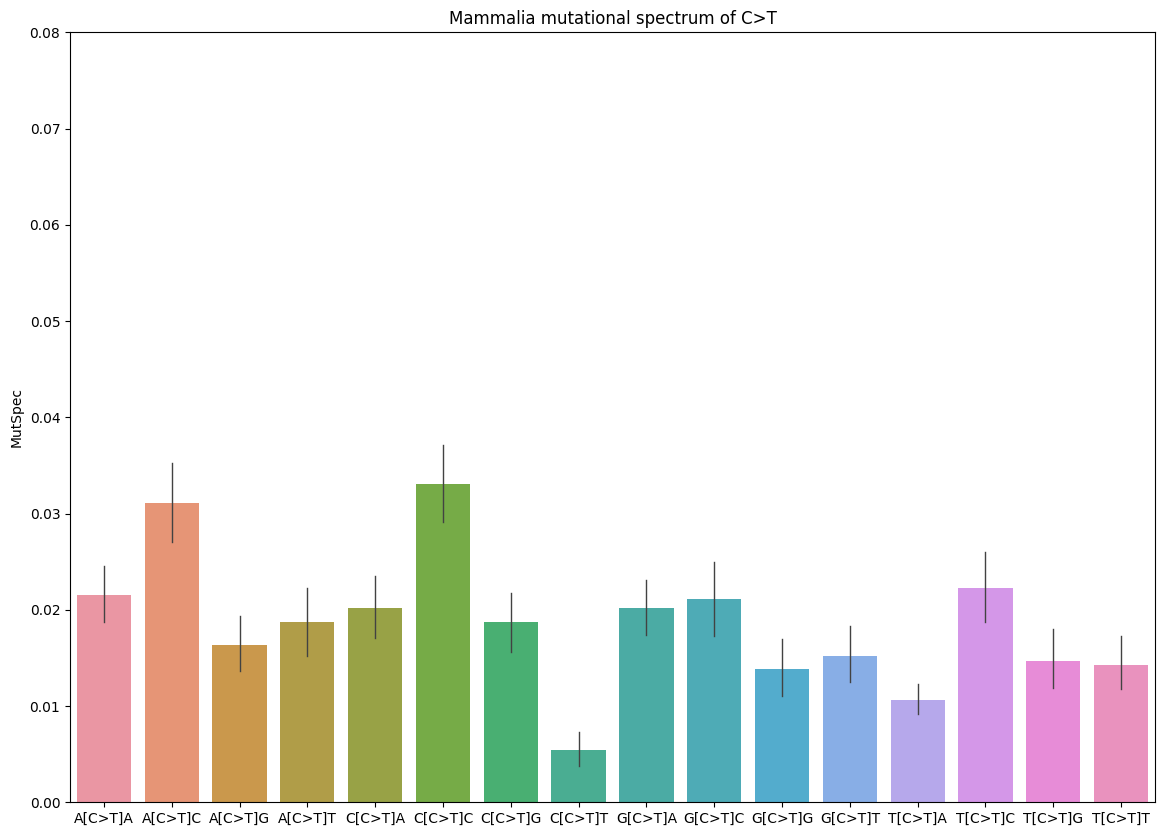

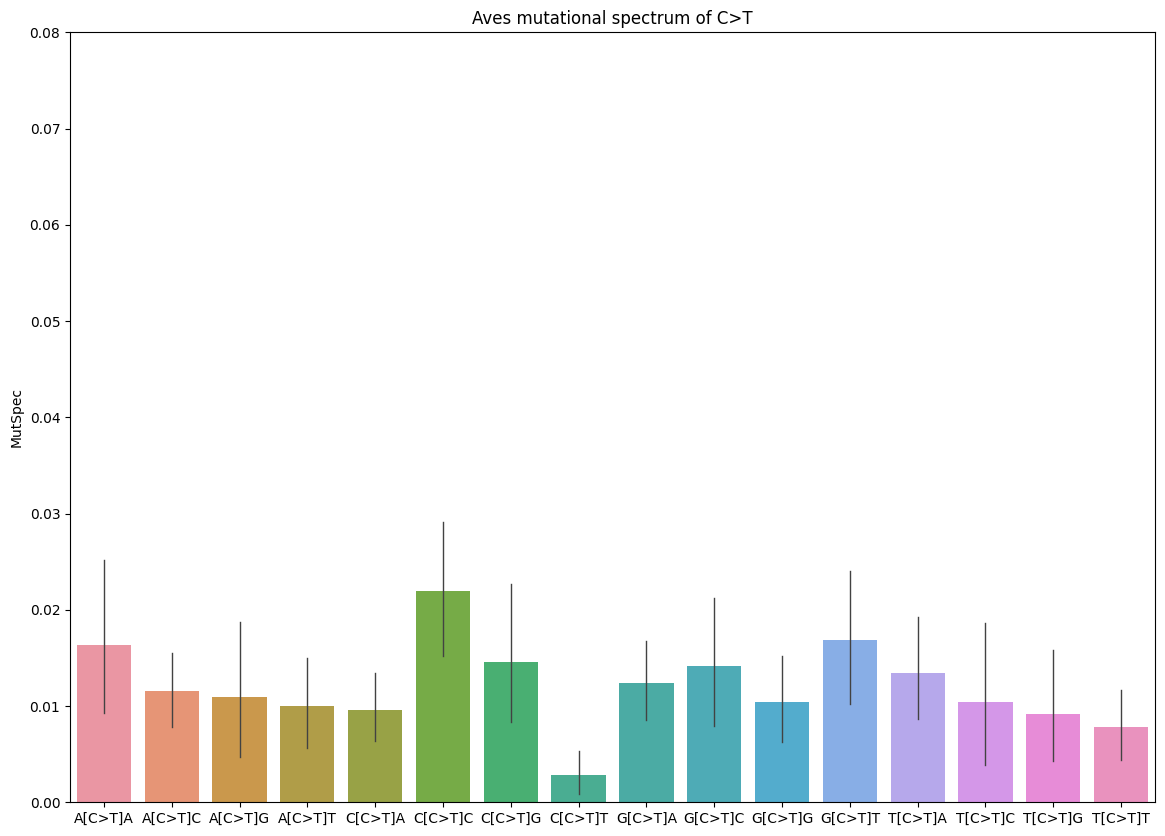

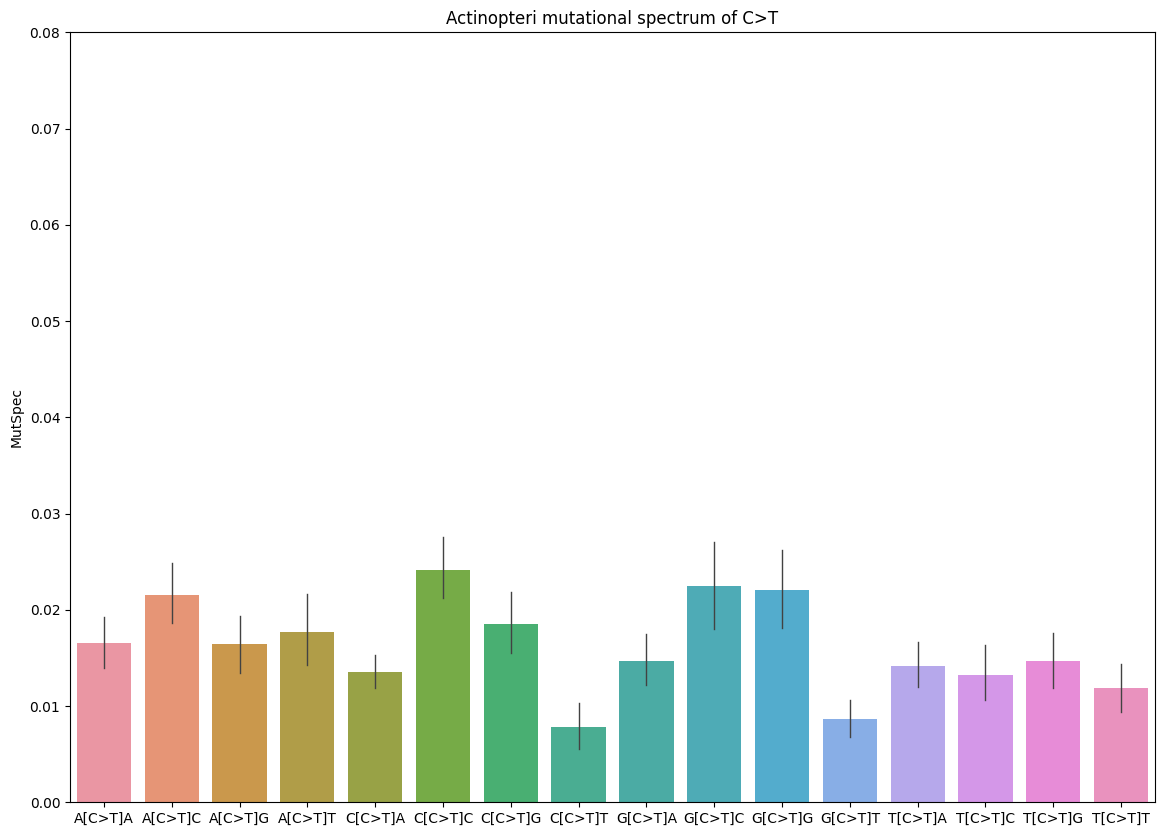

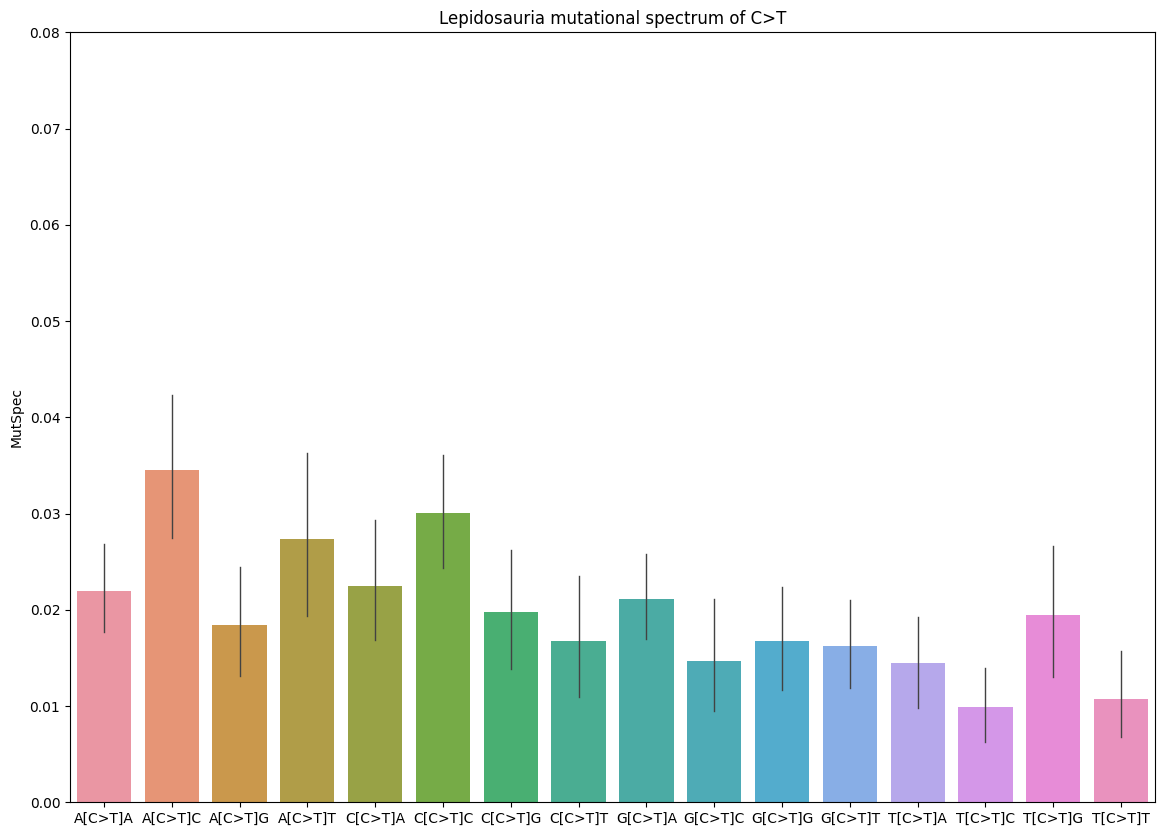

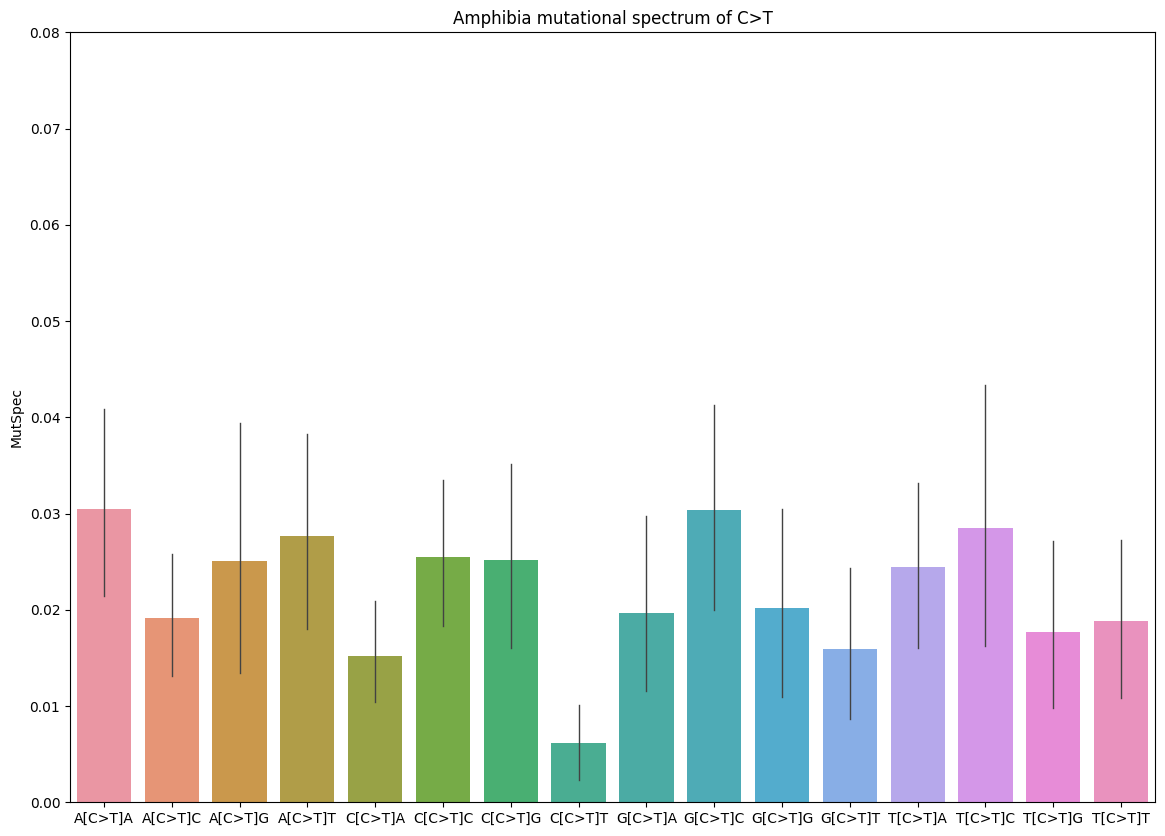

In [64]:
for tx in taxes_to_draw:
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111)   
    sns.barplot(x="Mut", y="MutSpec", data=CT_only[CT_only.Class == tx],
                order=C_T_arr, errwidth=1, ax=fig.gca())
    ax.set_xlabel('')
    ax.set_title(f'{tx} mutational spectrum of C>T')
    ax.set_ylim(0, 0.08)
    plt.savefig(f'../pictures/MutSpec/CTMut{tx}.pdf',dpi=300)


### Analysis of A>G on heavy chain as a hallmark of 6MA

In [65]:
AG_only = mutspecs[mutspecs['MutBase'] == 'A>G']
A_G_arr = ["A[A>G]A", "A[A>G]C", "A[A>G]G", "A[A>G]T", "C[A>G]A", "C[A>G]C", "C[A>G]G", "C[A>G]T", 
    "G[A>G]A", "G[A>G]C", "G[A>G]G", "G[A>G]T", "T[A>G]A", "T[A>G]C", "T[A>G]G", "T[A>G]T"]
colorsAG = ['orange','orange','orange','orange','green','green','green','green',
            'salmon','salmon','salmon','salmon','royalblue','royalblue','royalblue','royalblue']

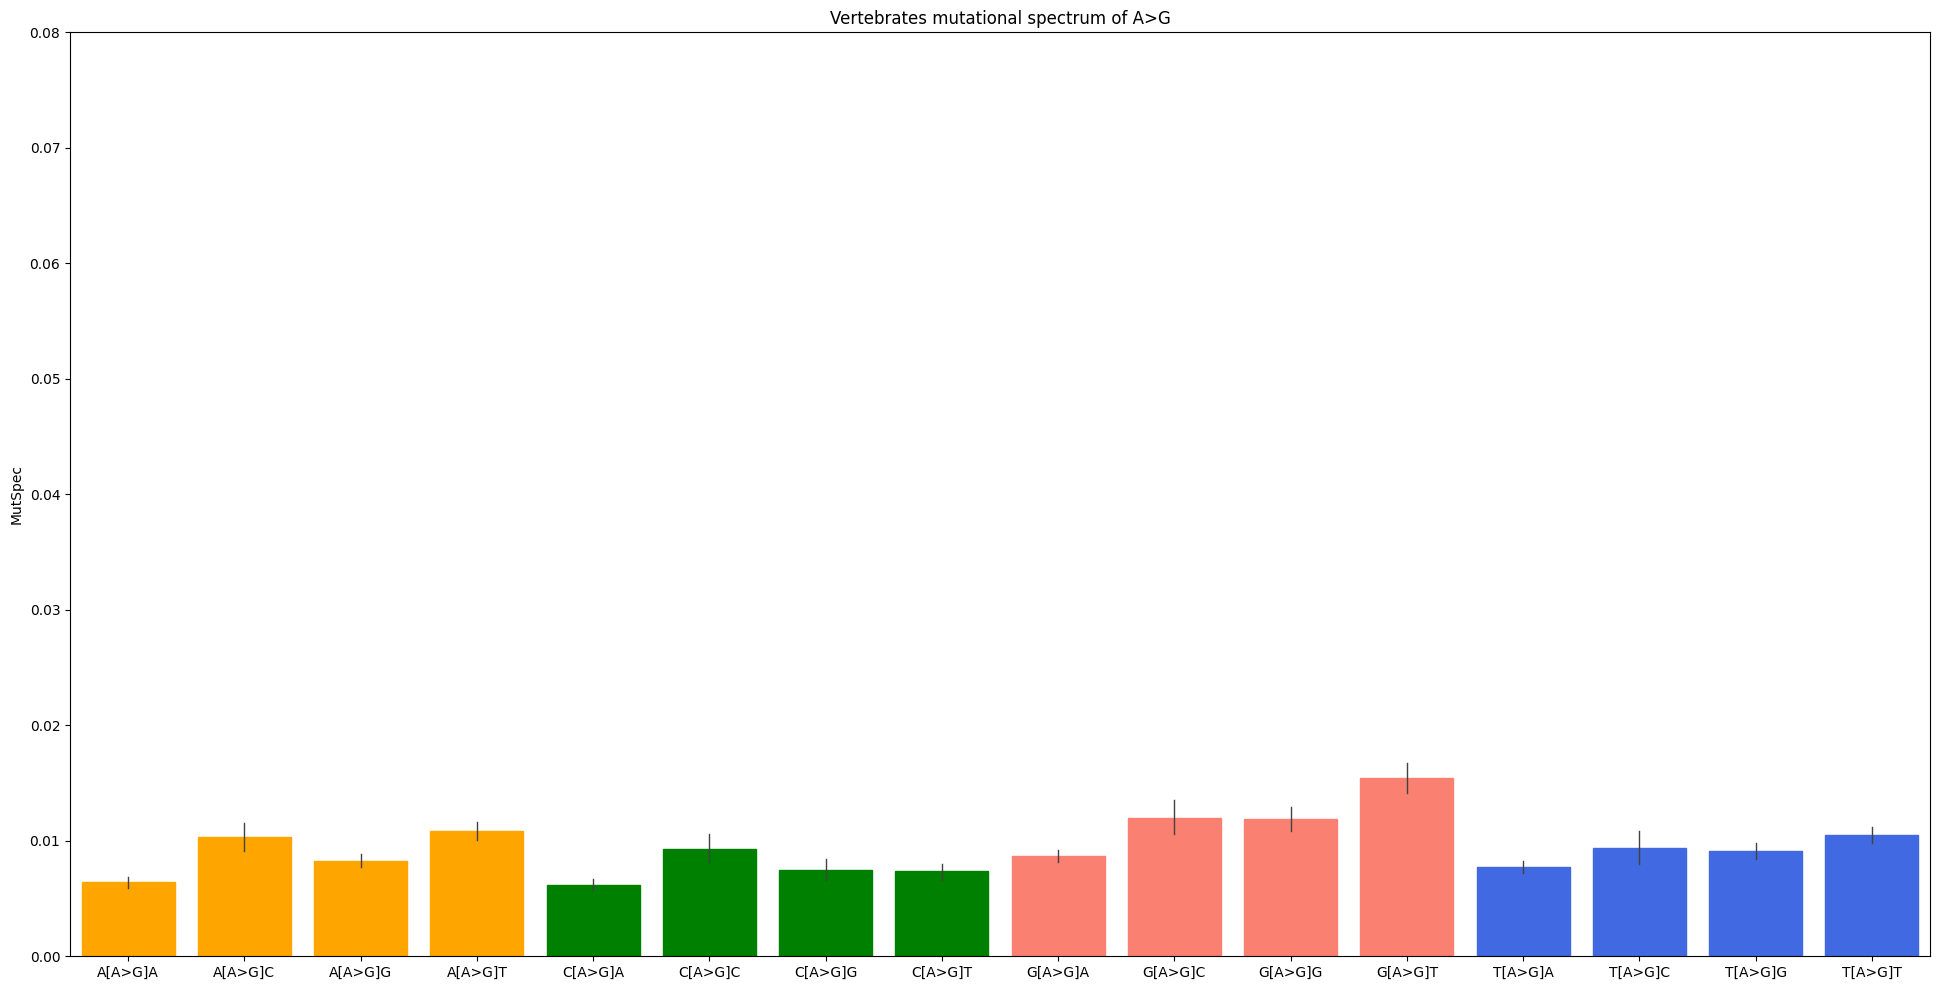

In [66]:
fig = plt.figure(figsize=(24, 12))
ax = fig.add_subplot(111)
sns.barplot(x="Mut", y="MutSpec", data=AG_only,
            order=A_G_arr, errwidth=1, ax=fig.gca())
for bar, clr in zip(ax.patches, colorsAG):
        bar.set_color(clr)
ax.set_xlabel('')
ax.set_title('Vertebrates mutational spectrum of A>G')
ax.set_ylim(0, 0.08)
plt.savefig('../pictures/MutSpec/AGMutVert.pdf',dpi=300)
plt.show()

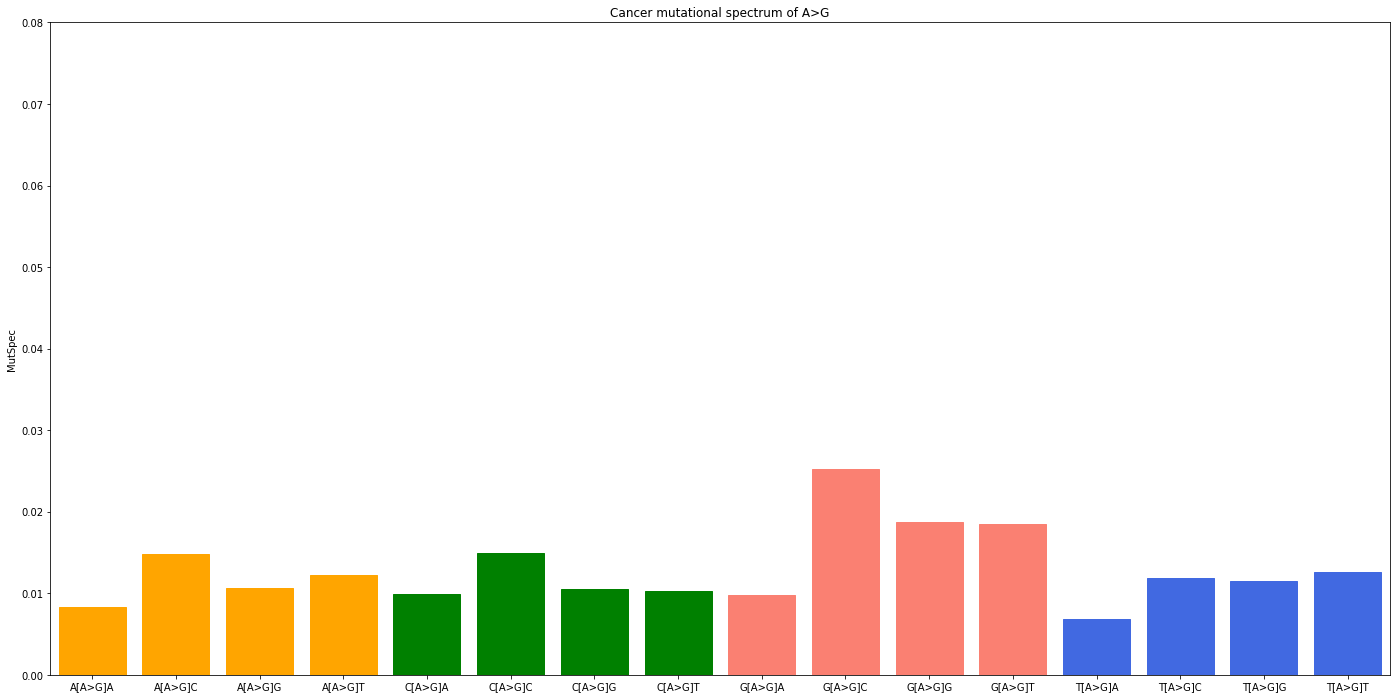

In [36]:
fig = plt.figure(figsize=(24, 12))
ax = fig.add_subplot(111)
sns.barplot(x="Mut", y="MutSpec", data=exdloop[exdloop['Mut'].isin(A_G_arr)],
            order=A_G_arr, ax=fig.gca())
for bar, clr in zip(ax.patches, colorsAG):
        bar.set_color(clr)
ax.set_xlabel('')
ax.set_title('Cancer mutational spectrum of A>G')
ax.set_ylim(0,0.08)
plt.savefig('../pictures/MutSpec/AGMutCancer.pdf',dpi=300)


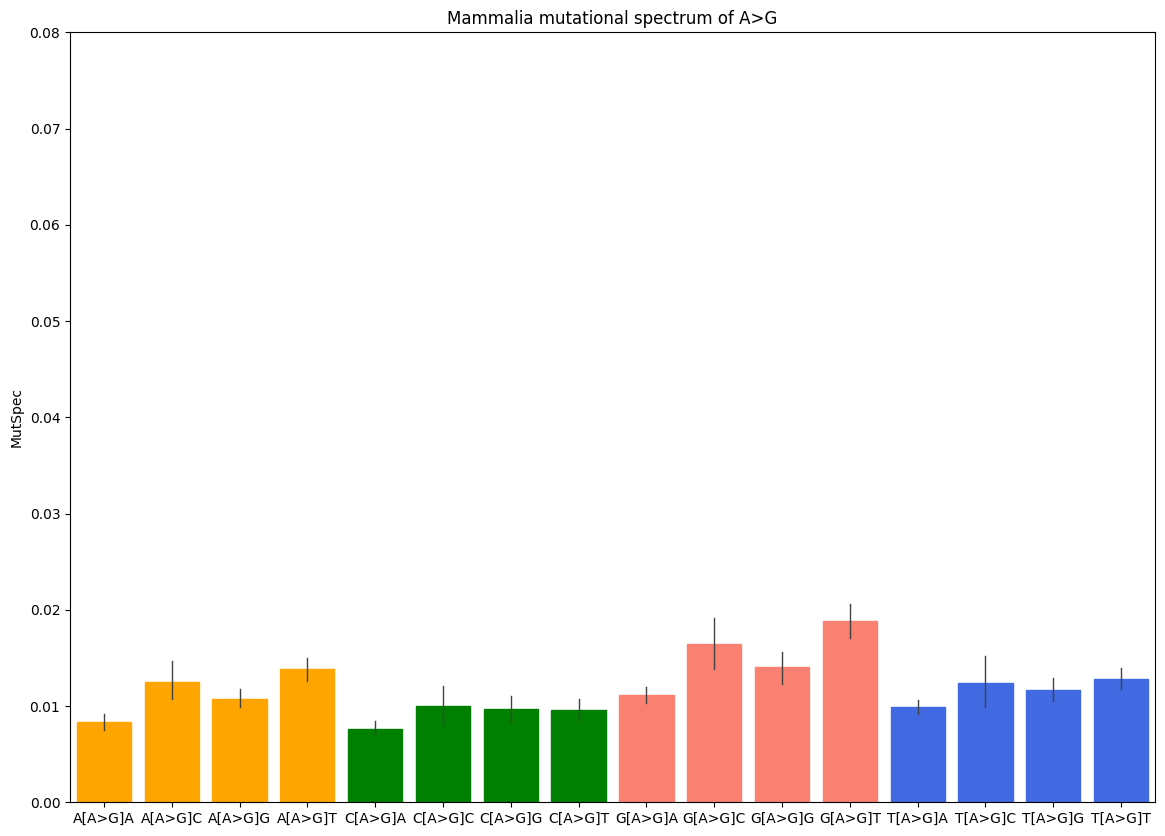

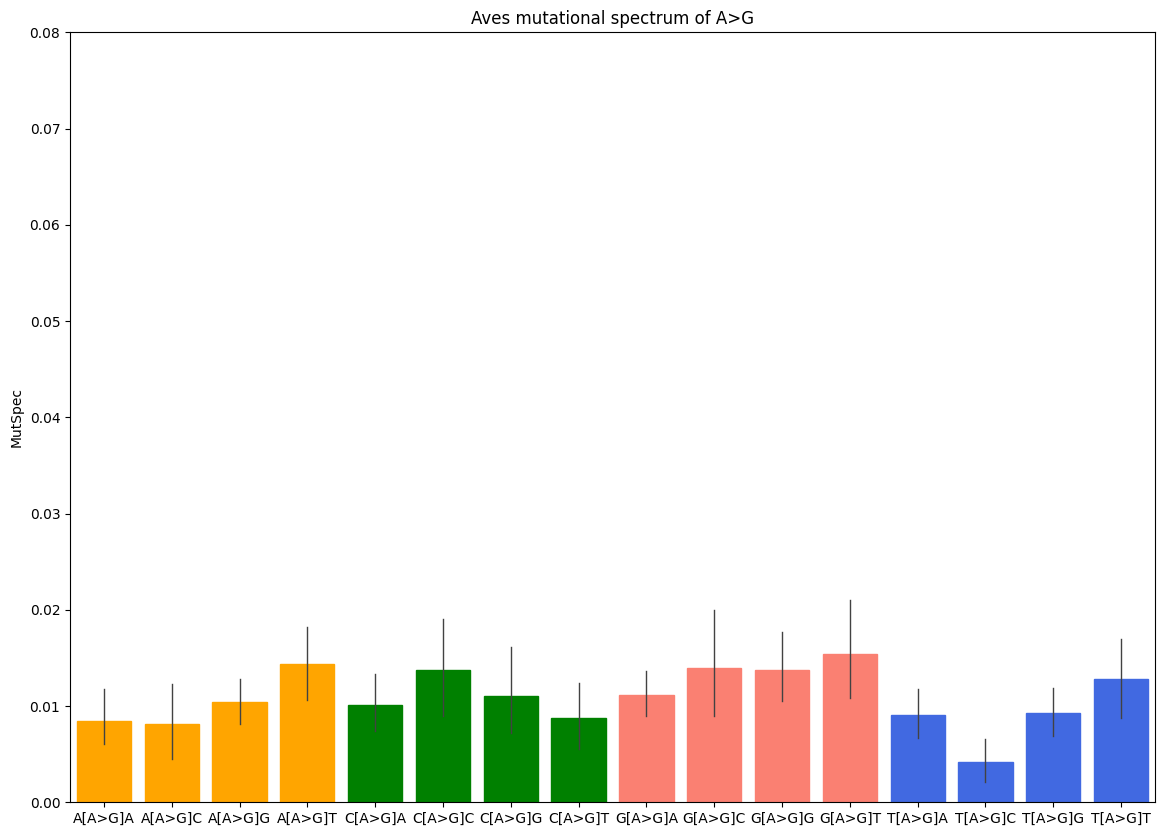

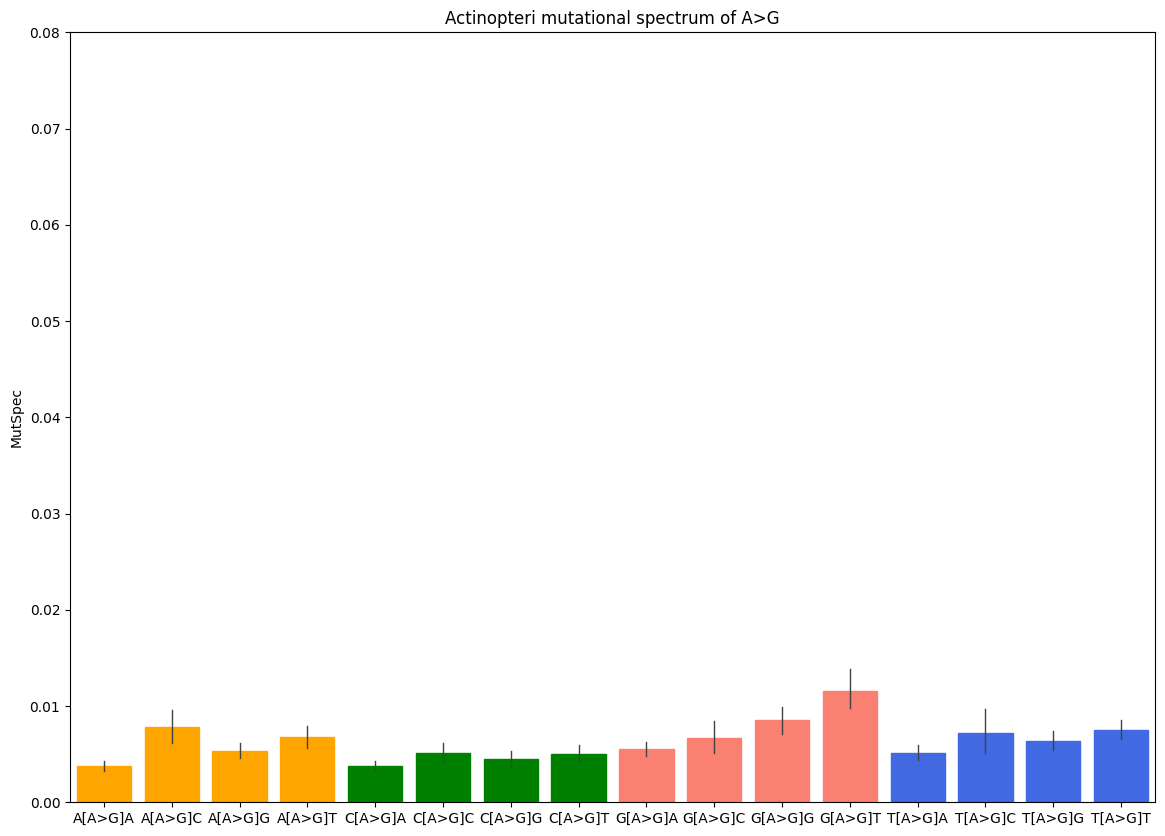

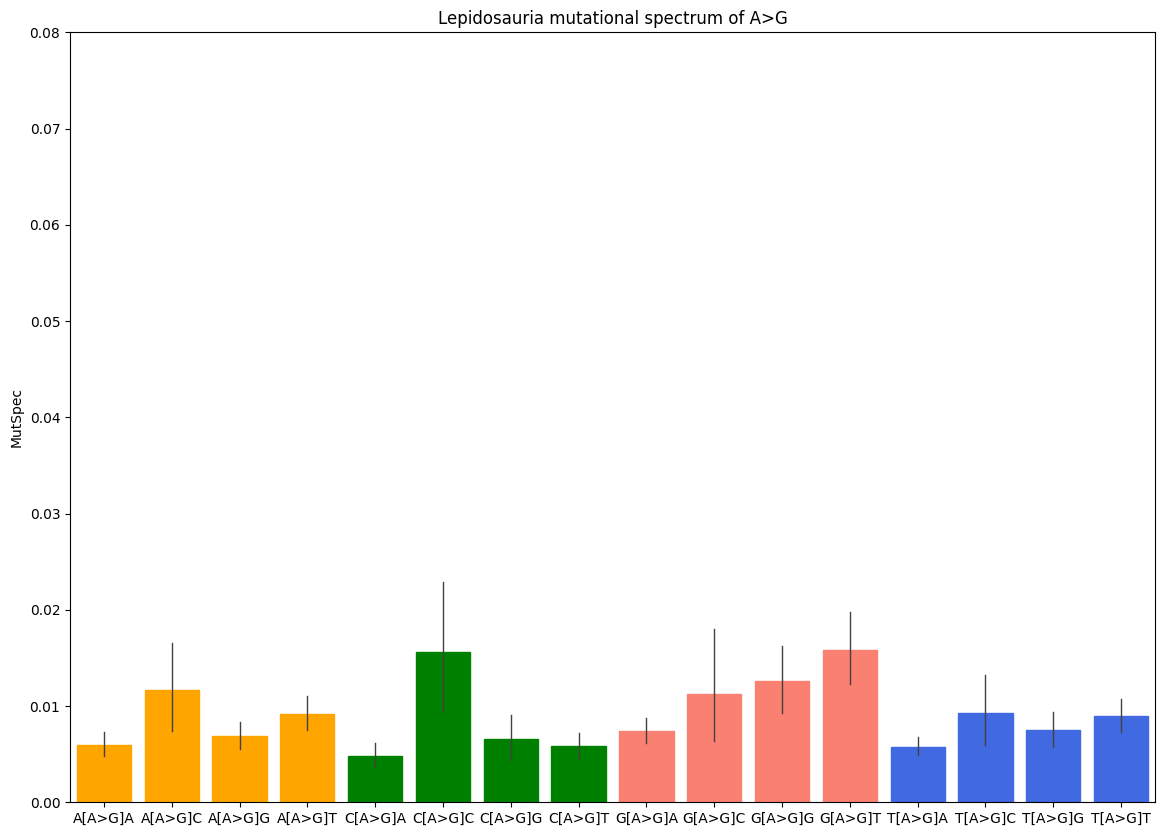

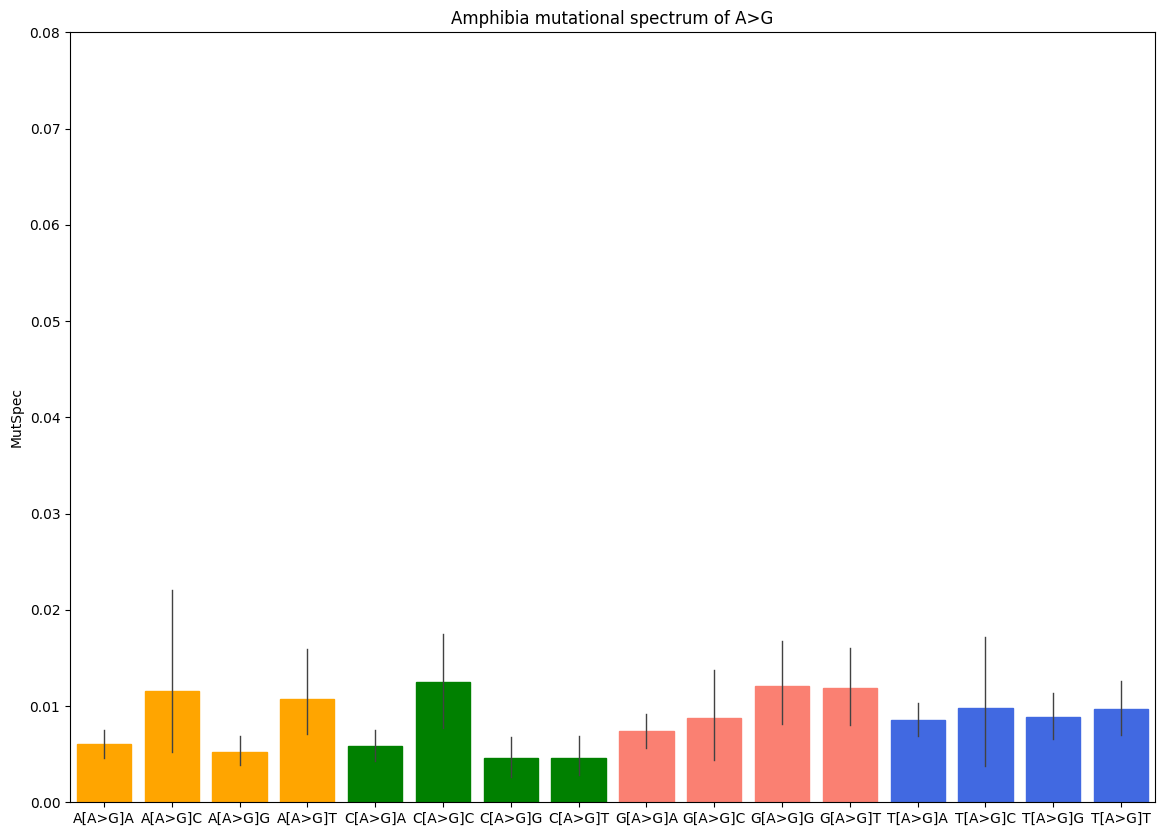

In [67]:
for tx in taxes_to_draw:
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111)   
    sns.barplot(x="Mut", y="MutSpec", data=AG_only[AG_only.Class == tx],
                order=A_G_arr, errwidth=1, ax=fig.gca())
    for bar, clr in zip(ax.patches, colorsAG):
        bar.set_color(clr)
    ax.set_xlabel('')
    ax.set_title(f'{tx} mutational spectrum of A>G')
    ax.set_ylim(0, 0.08)
    plt.savefig(f'../pictures/MutSpec/AGMut{tx}.pdf',dpi=300)

### Draw MutSpec for 3 left genes (CO1, CO3, ND2)

In [70]:
mutspecs_all = pd.read_csv('../data/new_dataset/MutSpecVertebrates192.csv.gz')
mutspecs_all = mutspecs_all.fillna(0)
mutspecs_all['Mut'] = mutspecs_all.Mut.apply(getrevers)
mutspecs_all["MutBase"] = mutspecs_all.Mut.str.slice(2, 5)
mutspecs_all["Context"] = mutspecs_all.Mut.str.get(0) + mutspecs_all.Mut.str.get(2) + mutspecs_all.Mut.str.get(-1)
mutspecs_all = mutspecs_all[mutspecs_all.Gene != 'Cytb']
mutspecs_all.head()

,Gene,Class,Species,Mut,Observed,Expected,MutSpec,MutBase,Context
0,CO1,Mammalia,Crocuta_crocuta,T[T>G]T,0.0,0.000000,0.0,T>G,TTT
1,CO1,Mammalia,Crocuta_crocuta,G[T>G]T,0.0,0.000000,0.0,T>G,GTT
2,CO1,Mammalia,Crocuta_crocuta,C[T>G]T,0.0,0.000000,0.0,T>G,CTT
3,CO1,Mammalia,Crocuta_crocuta,A[T>G]T,0.0,0.000000,0.0,T>G,ATT
4,CO1,Mammalia,Crocuta_crocuta,T[T>G]G,0.0,13.666667,0.0,T>G,TTG


In [75]:
mutspecs_all[mutspecs_all.Gene == 'CO3']

,Gene,Class,Species,Mut,Observed,Expected,MutSpec,MutBase,Context
833088,CO3,Mammalia,Balaenoptera_physalus,T[T>G]T,0.0,0.000000,0.0,T>G,TTT
833089,CO3,Mammalia,Balaenoptera_physalus,G[T>G]T,0.0,0.000000,0.0,T>G,GTT
833090,CO3,Mammalia,Balaenoptera_physalus,C[T>G]T,0.0,0.000000,0.0,T>G,CTT
833091,CO3,Mammalia,Balaenoptera_physalus,A[T>G]T,0.0,0.000000,0.0,T>G,ATT
833092,CO3,Mammalia,Balaenoptera_physalus,T[T>G]G,0.0,9.969697,0.0,T>G,TTG
...,...,...,...,...,...,...,...,...,...
878203,CO3,Amphibia,Hyla_meridionalis,A[A>C]C,0.0,0.000000,0.0,A>C,AAC
878204,CO3,Amphibia,Hyla_meridionalis,T[A>C]A,0.0,4.285714,0.0,A>C,TAA
878205,CO3,Amphibia,Hyla_meridionalis,G[A>C]A,0.0,2.285714,0.0,A>C,GAA
878206,CO3,Amphibia,Hyla_meridionalis,C[A>C]A,0.0,1.000000,0.0,A>C,CAA


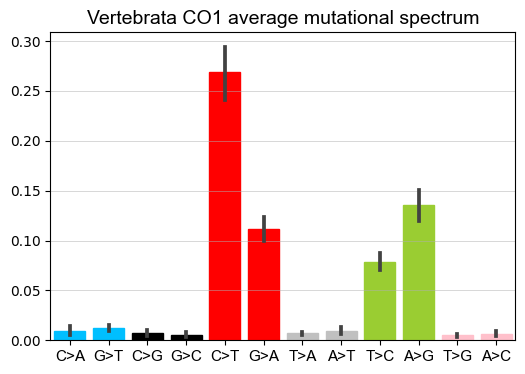

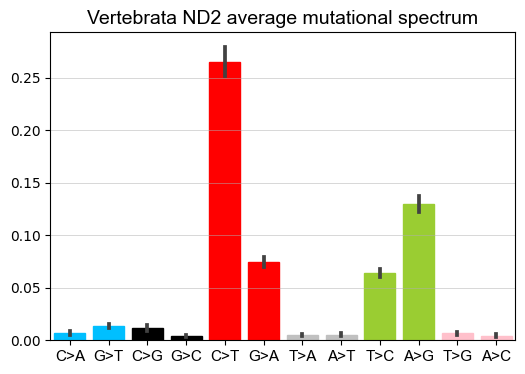

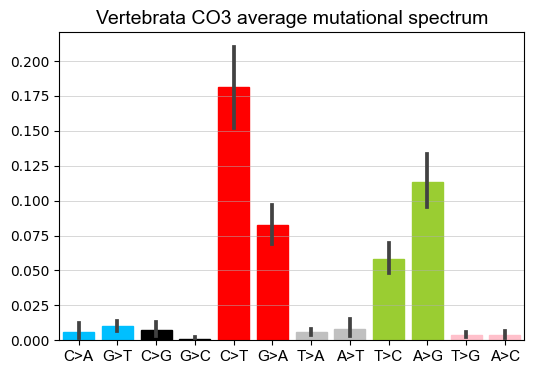

In [77]:
for gene in mutspecs_all.Gene.drop_duplicates():
    _gene_species_spectra12 = mutspecs_all[mutspecs_all.Gene == gene].copy()
    _gene_species_spectra12["Mut"] = _gene_species_spectra12["Mut"].str.slice(2,5)
    ax = plot_mutspec12(
        _gene_species_spectra12.groupby(["Species", "Mut"]).MutSpec.sum().reset_index(), 
        fontname="Arial", ticksize=11, title=f"Vertebrata {gene} average mutational spectrum",
        savepath=f"../pictures/MutSpec/Mut12Vert{gene}.pdf")

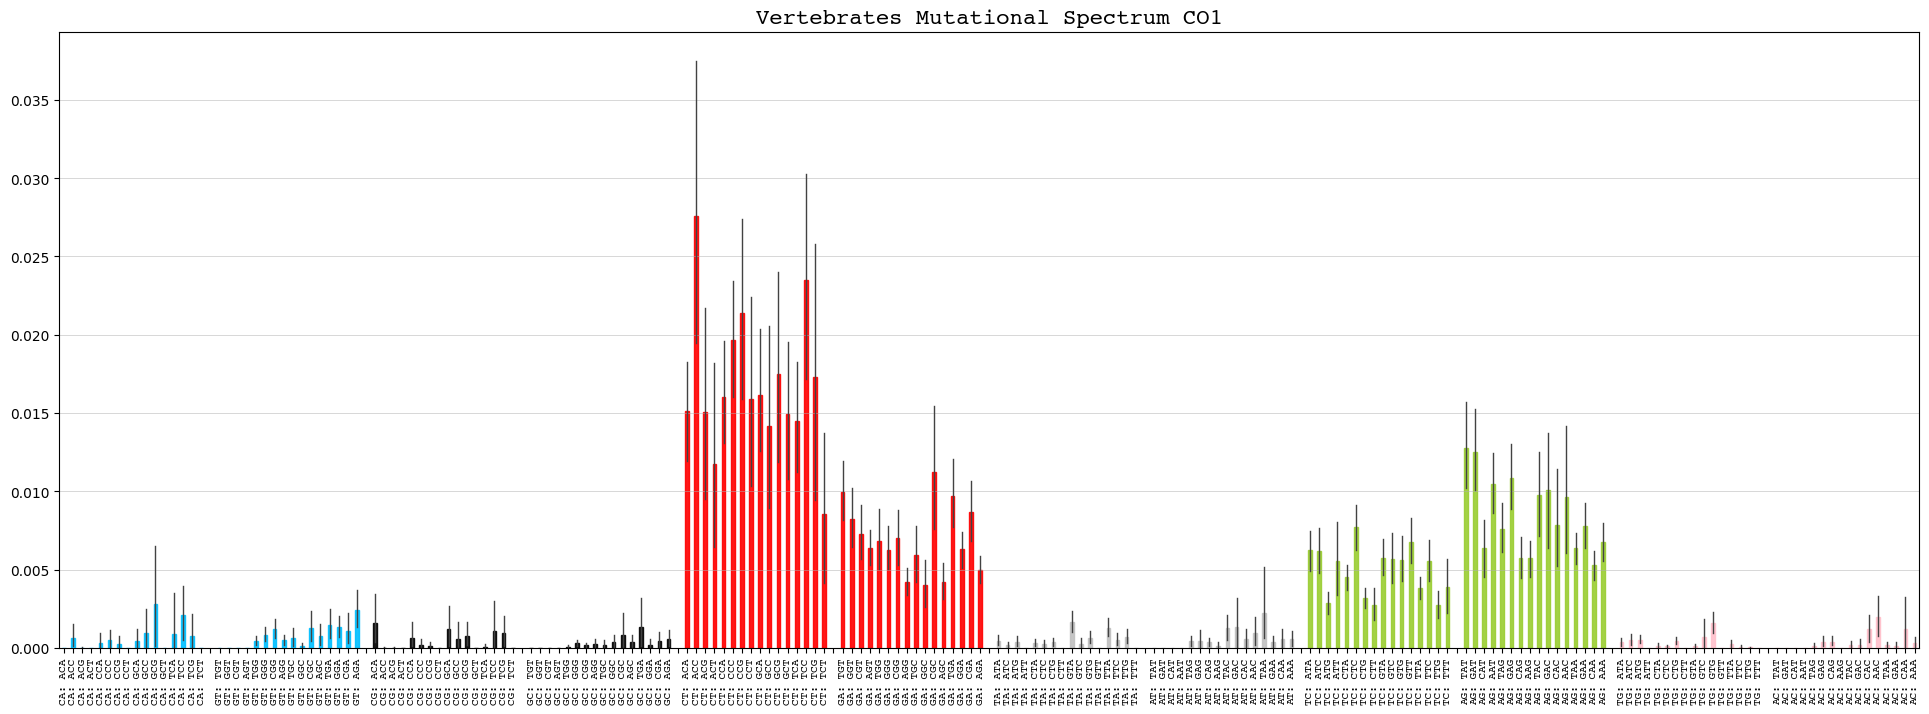

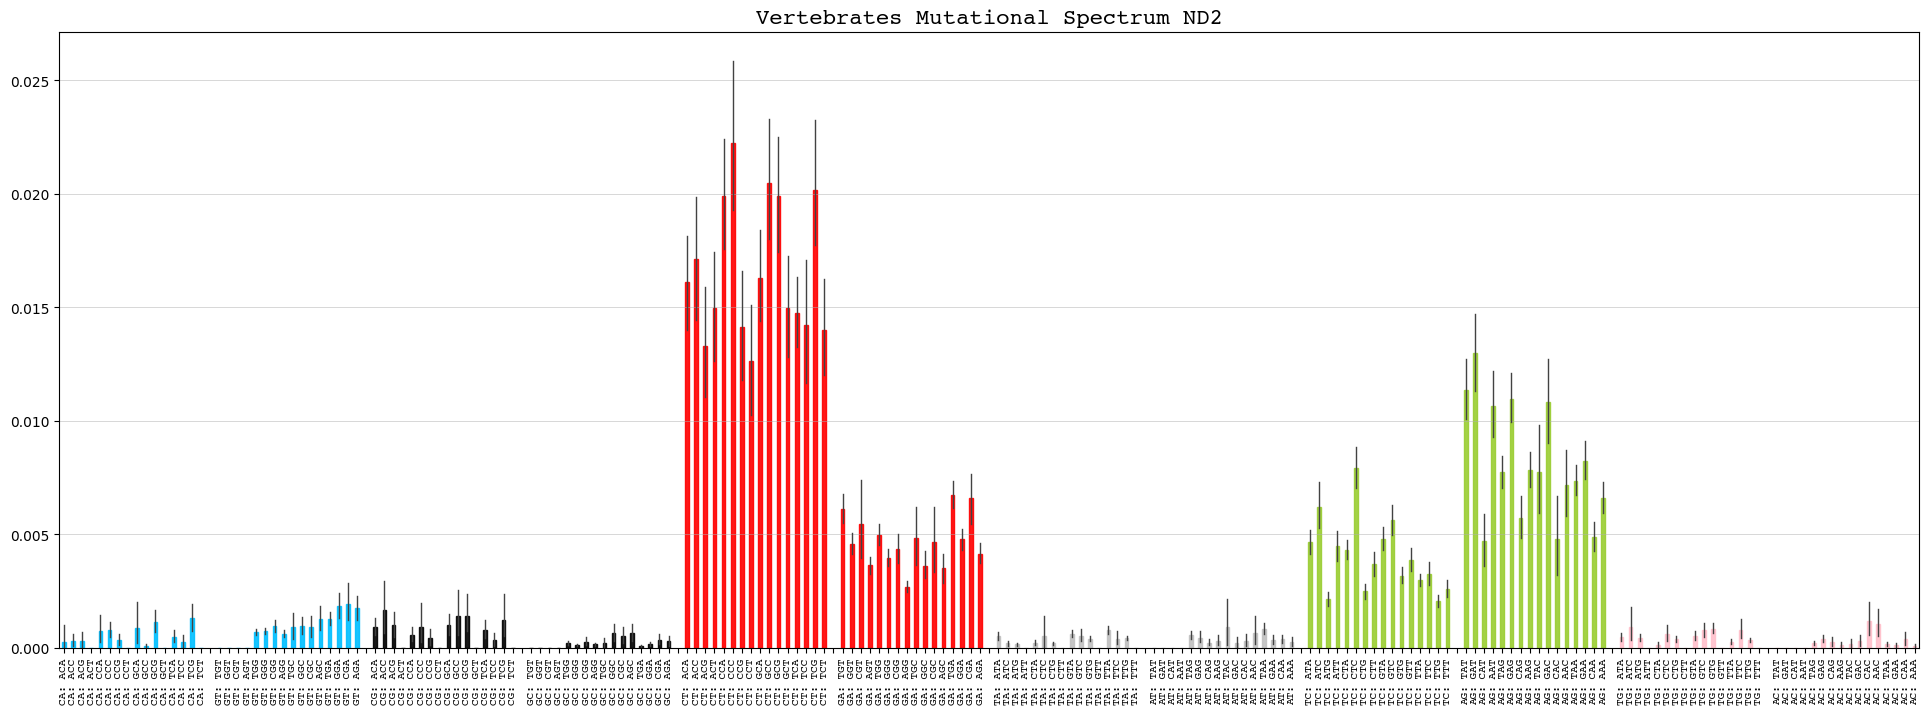

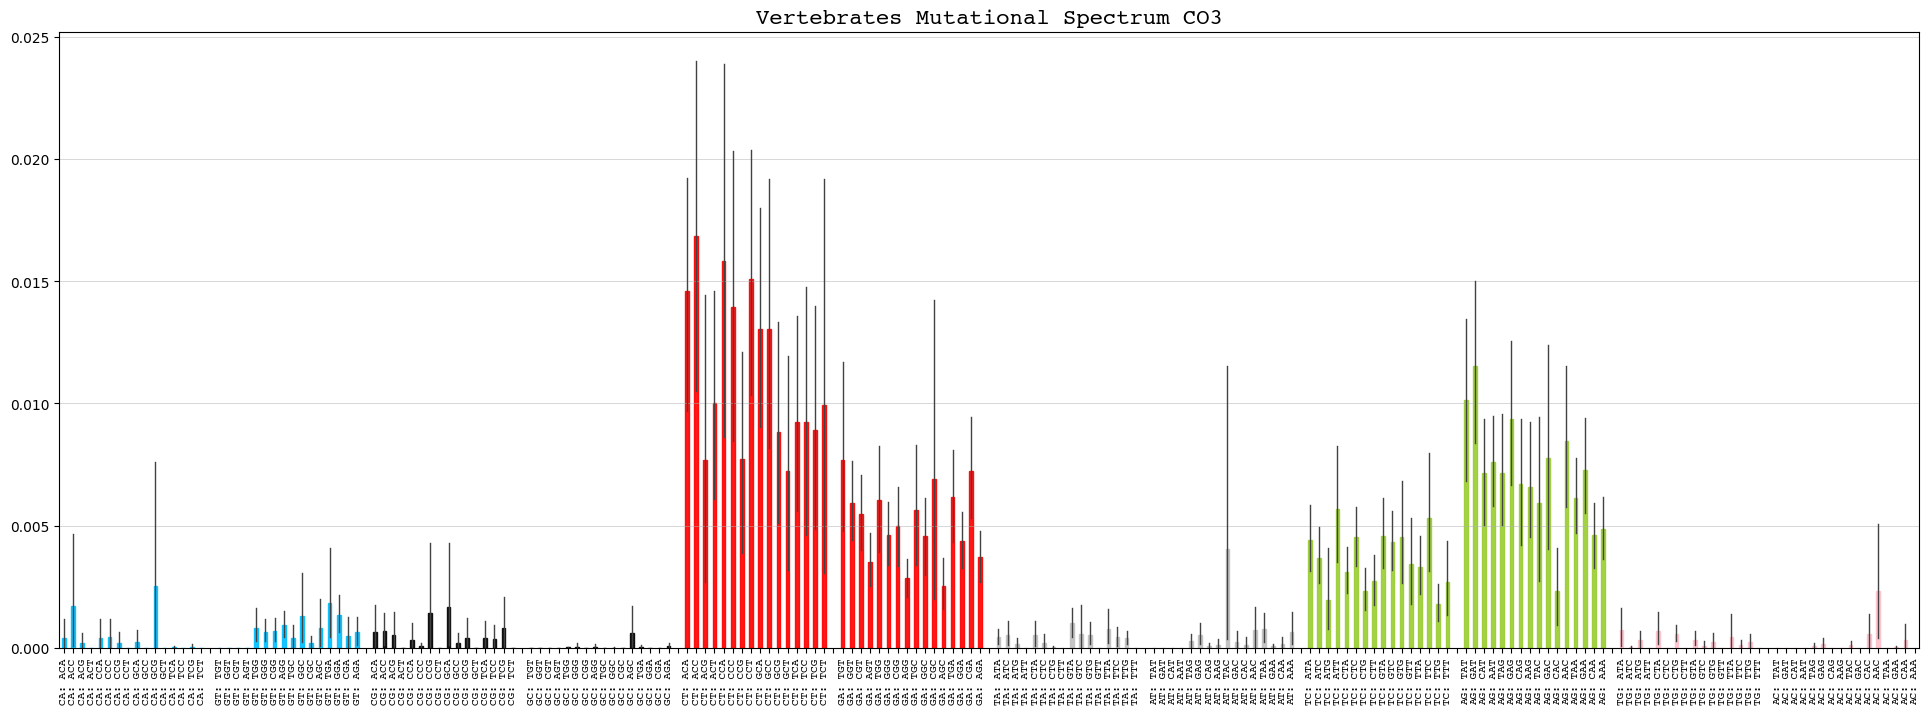

In [79]:
for gene in mutspecs_all.Gene.drop_duplicates():
    plot_mutspec192(mutspecs_all[mutspecs_all.Gene == gene], title=f'Vertebrates Mutational Spectrum {gene}', savepath=f'../pictures/MutSpec/MutSpec192Vert{gene}.pdf',
                    fontname='Courier', ticksize=8, labels_style='long')

### Make table of mean spectra for all classes and human cancer


In [13]:
mutspecs = pd.read_csv('../data/new_dataset/MutSpecVertebrates192.csv.gz')
mutspecs = mutspecs[mutspecs.Gene == 'Cytb']
mutspecs = mutspecs.fillna(0)
mutspecs['Mut'] = mutspecs.Mut.apply(getrevers)
mutspecs["MutBase"] = mutspecs.Mut.str.slice(2, 5)
mutspecs["Context"] = mutspecs.Mut.str.get(0) + mutspecs.Mut.str.get(2) + mutspecs.Mut.str.get(-1)
mutspecs.head()

,Gene,Class,Species,Mut,Observed,Expected,MutSpec,MutBase,Context
39552,Cytb,Mammalia,Tarsius_dentatus,T[T>G]T,0.0,0.00,0.0,T>G,TTT
39553,Cytb,Mammalia,Tarsius_dentatus,G[T>G]T,0.0,0.00,0.0,T>G,GTT
39554,Cytb,Mammalia,Tarsius_dentatus,C[T>G]T,0.0,0.00,0.0,T>G,CTT
39555,Cytb,Mammalia,Tarsius_dentatus,A[T>G]T,0.0,0.00,0.0,T>G,ATT
39556,Cytb,Mammalia,Tarsius_dentatus,T[T>G]G,0.0,11.95,0.0,T>G,TTG


In [16]:
mut_mn_cl = mutspecs.groupby(['Class', 'Mut']).MutSpec.mean().reset_index()
mut_mn_cl.head()

,Class,Mut,MutSpec
0,Actinopteri,A[A>C]A,0.000066
1,Actinopteri,A[A>C]C,0.001479
2,Actinopteri,A[A>C]G,0.000500
3,Actinopteri,A[A>C]T,0.000000
4,Actinopteri,A[A>G]A,0.006480


In [18]:
canc_df_draw['Class'] = 'Human Cancer'
canc_df_draw

,Mut,MutSpec,Class
0,A[A>C]A,0.000000,Human Cancer
1,A[A>C]C,0.000000,Human Cancer
2,A[A>C]G,0.000000,Human Cancer
3,A[A>C]T,0.000000,Human Cancer
4,A[A>G]A,0.000343,Human Cancer
...,...,...,...
187,T[T>C]T,0.000019,Human Cancer
188,T[T>G]A,0.000000,Human Cancer
189,T[T>G]C,0.000000,Human Cancer
190,T[T>G]G,0.000015,Human Cancer


In [33]:
final_mean_mutspec = pd.concat([mut_mn_cl, canc_df_draw])
final_mean_mutspec = final_mean_mutspec.pivot(index='Mut', columns='Class', values='MutSpec').reset_index()
final_mean_mutspec

Class,Mut,Actinopteri,Amphibia,Aves,Human Cancer,Lepidosauria,Mammalia
0,A[A>C]A,0.000066,0.000000,0.000000,0.000000,0.000023,0.000000
1,A[A>C]C,0.001479,0.000273,0.000000,0.000000,0.001169,0.000783
2,A[A>C]G,0.000500,0.000506,0.000051,0.000000,0.000357,0.000064
3,A[A>C]T,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,A[A>G]A,0.006480,0.007508,0.016672,0.000343,0.008653,0.011381
...,...,...,...,...,...,...,...
187,T[T>C]T,0.006858,0.004141,0.003578,0.000019,0.002366,0.003399
188,T[T>G]A,0.000458,0.000355,0.000364,0.000000,0.000393,0.000375
189,T[T>G]C,0.000397,0.000000,0.000000,0.000000,0.000233,0.000394
190,T[T>G]G,0.000828,0.001295,0.000183,0.000015,0.000728,0.000538


In [34]:
final_mean_mutspec.to_csv('../data/MeanMutSpecAll.csv', index=False, sep=';')